In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df='/content/drive/MyDrive/HousePrices.csv'

df=pd.read_csv(df)

df.head()

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Alley,Property_Shape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(2073, 81)

**Handling Null Values**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

In [6]:
nv=df.isnull().sum()
nv= nv[nv>0]
print(nv)

LotFrontage      320
Alley           1944
MasVnrType      1247
MasVnrArea        14
BsmtQual          59
BsmtCond          59
BsmtExposure      61
BsmtFinType1      59
BsmtFinType2      60
Electrical         1
FireplaceQu      988
GarageType       113
GarageYrBlt      113
GarageFinish     113
GarageQual       113
GarageCond       113
PoolQC          2065
Fence           1669
MiscFeature     1993
dtype: int64


In [7]:
nv=df.isnull().sum()
nv= nv[(nv[nv<=200]) & (nv[nv>0])]
print(nv)

MasVnrArea       14
BsmtQual         59
BsmtCond         59
BsmtExposure     61
BsmtFinType1     59
BsmtFinType2     60
Electrical        1
GarageType      113
GarageYrBlt     113
GarageFinish    113
GarageQual      113
GarageCond      113
dtype: int64


<ipython-input-7-e11b83fce5ec>:2: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  nv= nv[(nv[nv<=200]) & (nv[nv>0])]


In [8]:
nv=df.isnull().sum()
nv= nv[(nv[nv<=200]) & (nv[nv>0])]
print(nv.index)

Index(['MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Electrical', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond'],
      dtype='object')


<ipython-input-8-711c33397837>:2: FutureWarning: Operation between non boolean Series with different indexes will no longer return a boolean result in a future version. Cast both Series to object type to maintain the prior behavior.
  nv= nv[(nv[nv<=200]) & (nv[nv>0])]


Dividing data into contniuos and categorical for filling Null Values

In [9]:
cat=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageFinish','GarageQual','GarageCond']
con=['MasVnrArea','GarageYrBlt']

In [10]:
for i in nv.index:
  print(df[i].value_counts())
  print('**************************************')

MasVnrArea
0.0      1229
108.0      12
340.0      10
106.0       9
210.0       9
         ... 
594.0       1
219.0       1
479.0       1
584.0       1
74.0        1
Name: count, Length: 342, dtype: int64
**************************************
BsmtQual
Gd    904
TA    891
Ex    169
Fa     50
Name: count, dtype: int64
**************************************
BsmtCond
TA    1851
Gd     100
Fa      61
Po       2
Name: count, dtype: int64
**************************************
BsmtExposure
No    1349
Av     322
Gd     181
Mn     160
Name: count, dtype: int64
**************************************
BsmtFinType1
Unf    604
GLQ    599
ALQ    319
BLQ    210
Rec    173
LwQ    109
Name: count, dtype: int64
**************************************
BsmtFinType2
Unf    1770
Rec      79
LwQ      68
BLQ      50
ALQ      24
GLQ      22
Name: count, dtype: int64
**************************************
Electrical
SBrkr    1901
FuseA     127
FuseF      40
FuseP       3
Mix         1
Name: count, dtype: int64
**

In [11]:
## doing ffill in MasVnrArea, Electrical  as there is very less null values in both 14,1 respectively

In [12]:
df[['MasVnrArea', 'Electrical']] = df[['MasVnrArea', 'Electrical']].ffill()

In [13]:
for  i in cat:
  df[i] = df[i].fillna(df[i].mode()[0])

In [14]:
for i in ['MasVnrArea','LotFrontage']:
    df[i] = df[i].fillna(df[i].median())

In [15]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)

<ipython-input-15-ec3b4f50ec79>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0],inplace=True)


In [16]:
df.dropna(axis=1,inplace=True)

In [17]:
nv=df.isnull().sum()
nv= nv[nv>0]
print(nv)

Series([], dtype: int64)


In [18]:
df.shape

(2073, 75)

**Handling Duplicated**

In [19]:
df.duplicated().sum()

13

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

0

**EDA**

In [22]:
df['Neighborhood'].dtypes()

TypeError: 'numpy.dtypes.ObjectDType' object is not callable

In [23]:
cat_cols = df.dtypes[df.dtypes=='object'].index
num_cols = df.select_dtypes(exclude='object').columns

In [24]:
print(cat_cols)
print(num_cols)

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')
Index(['Id', 'Dwell_Type', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrB

In [25]:
## alley masvnrtype,fireplacequ, poolqc,fence,miscfeature  will drop

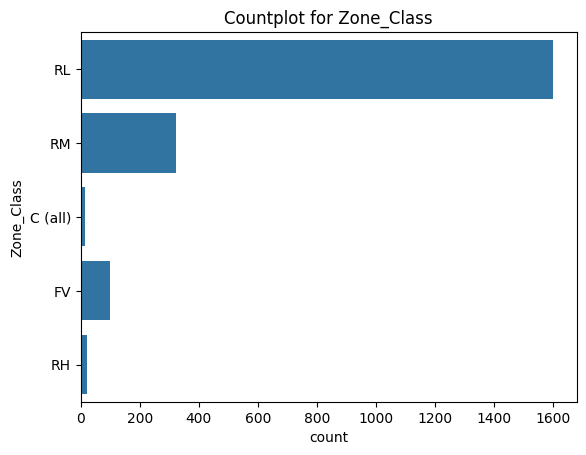

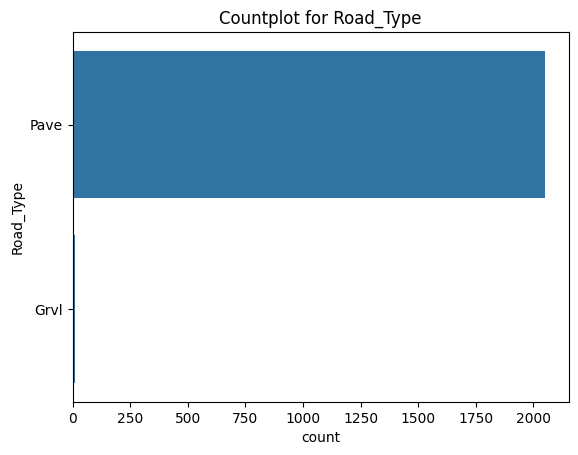

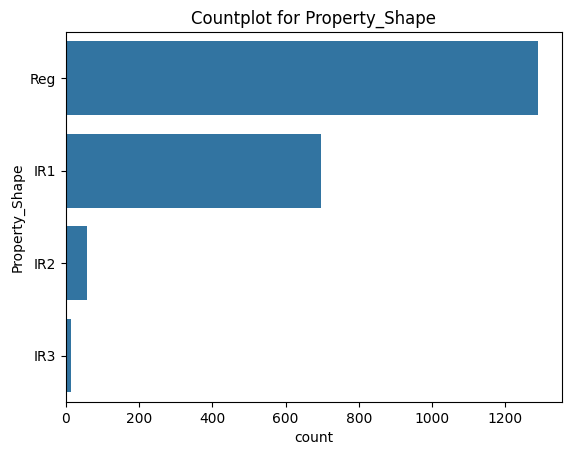

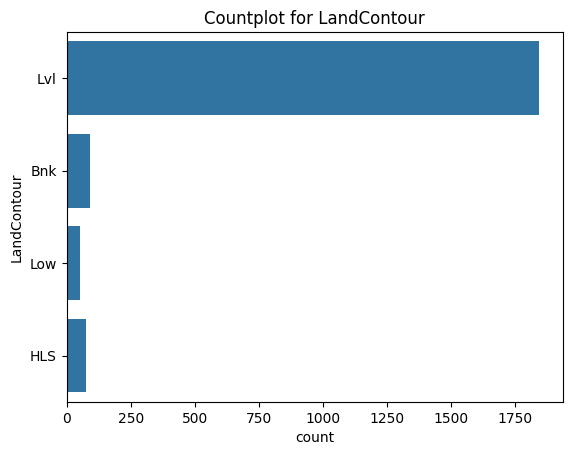

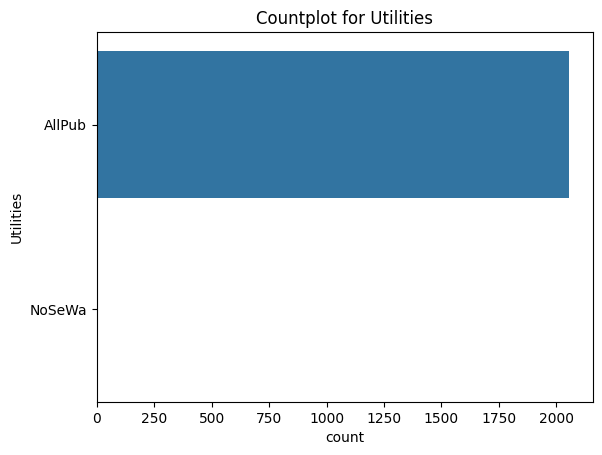

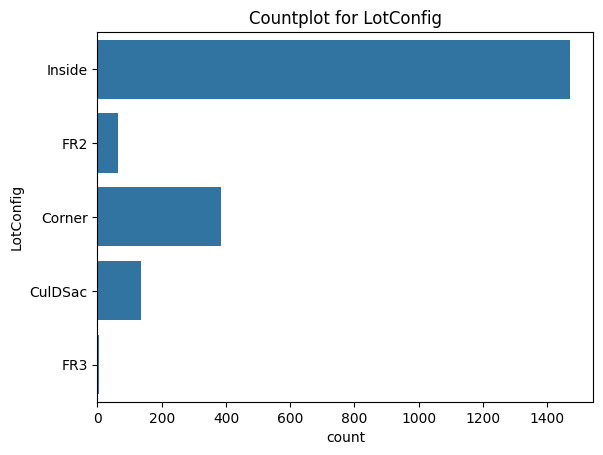

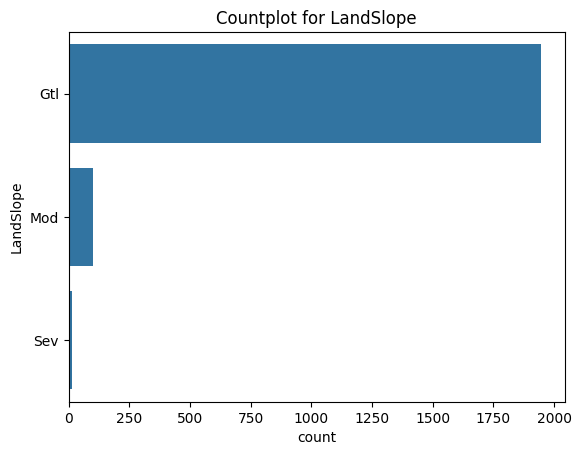

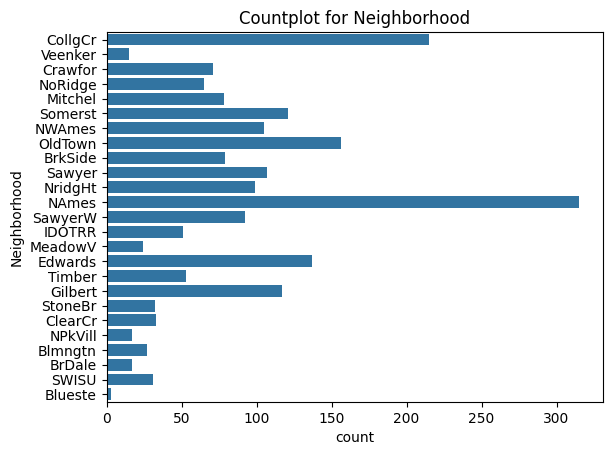

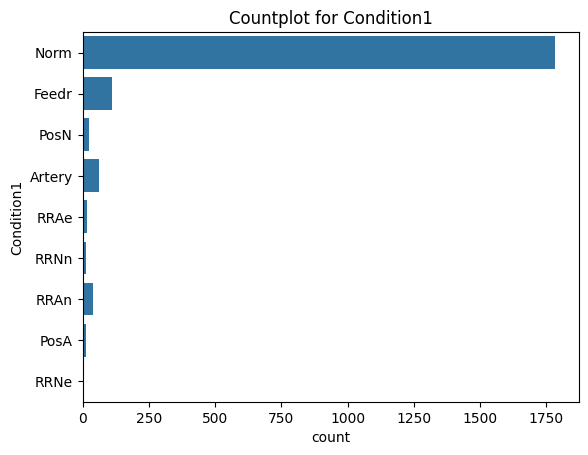

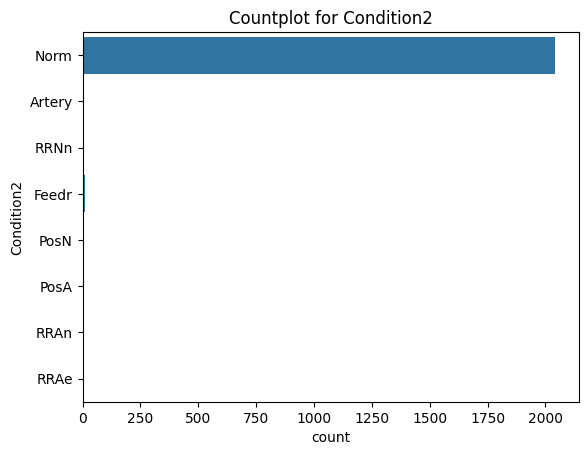

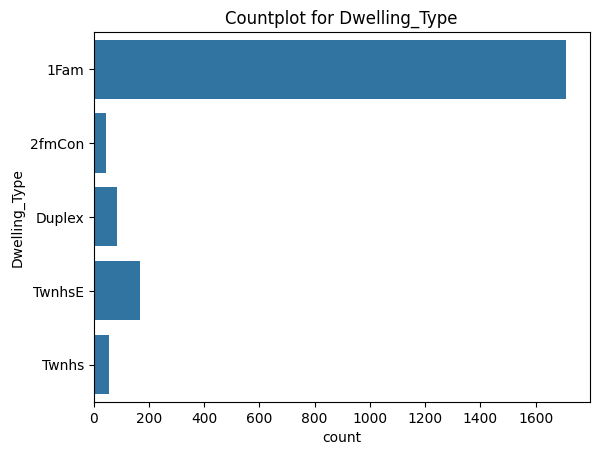

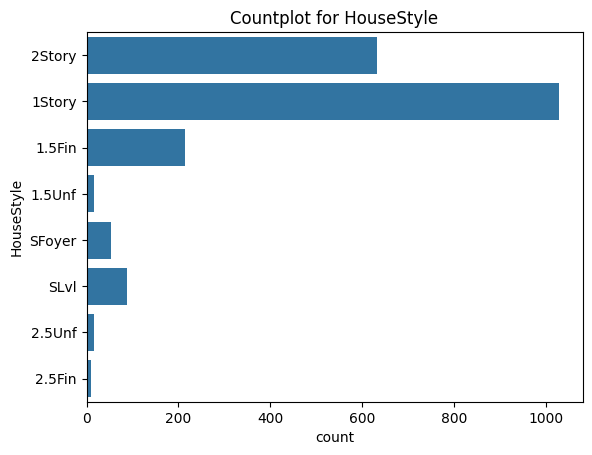

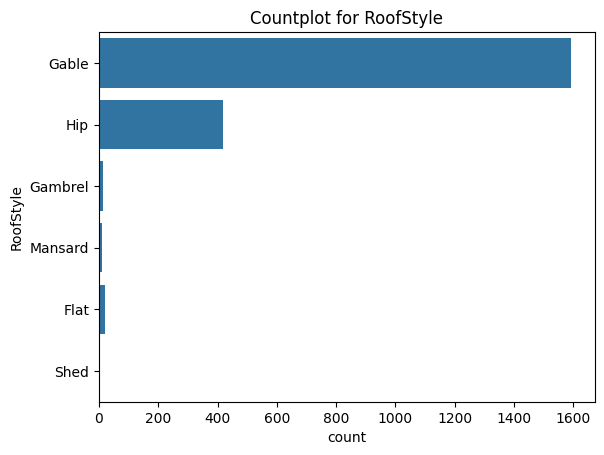

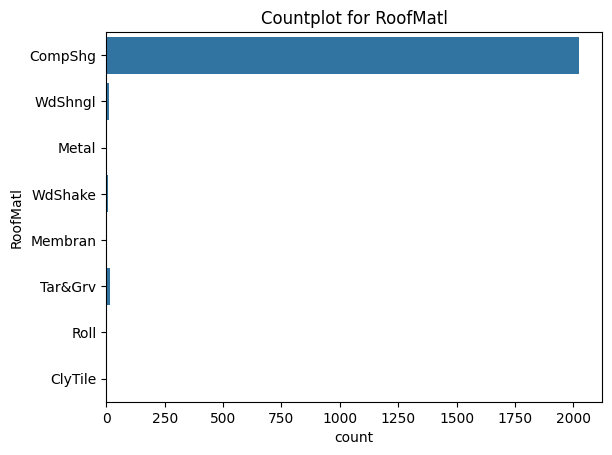

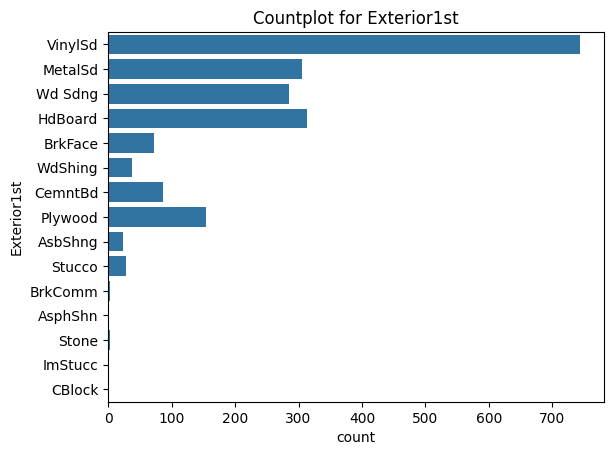

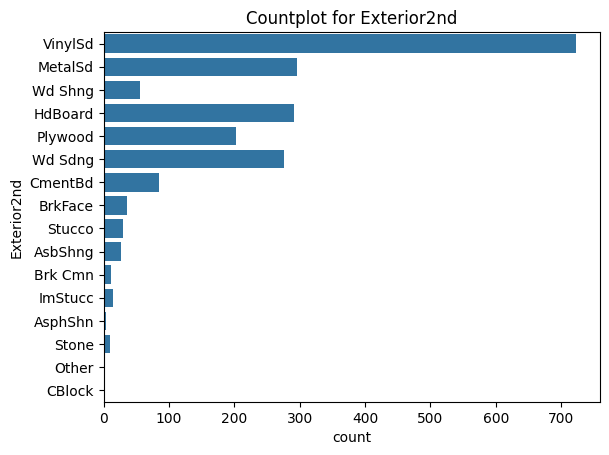

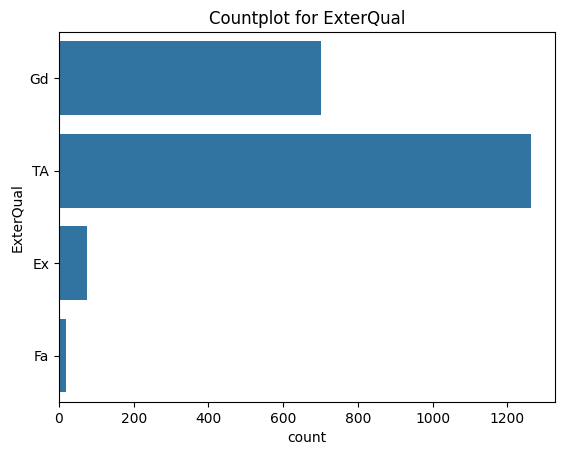

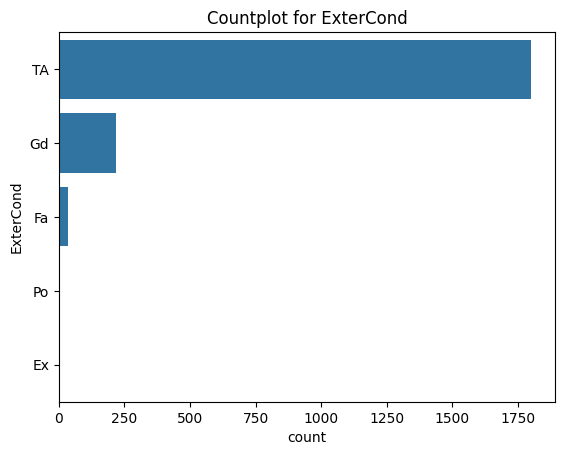

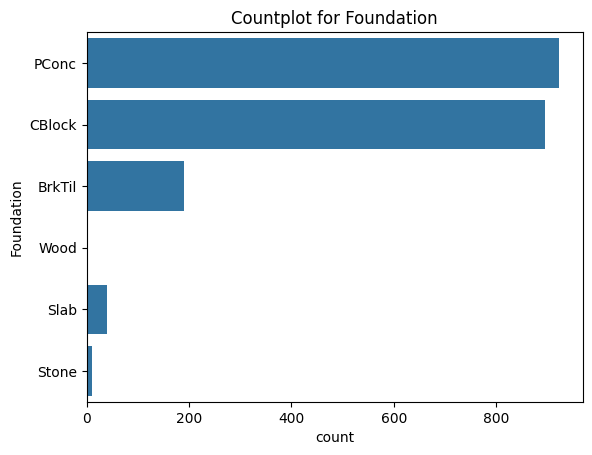

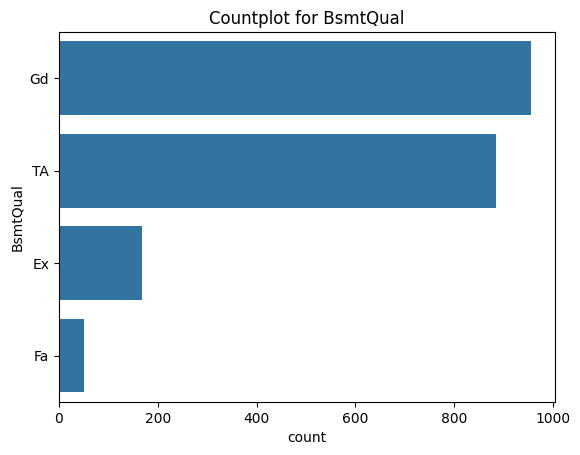

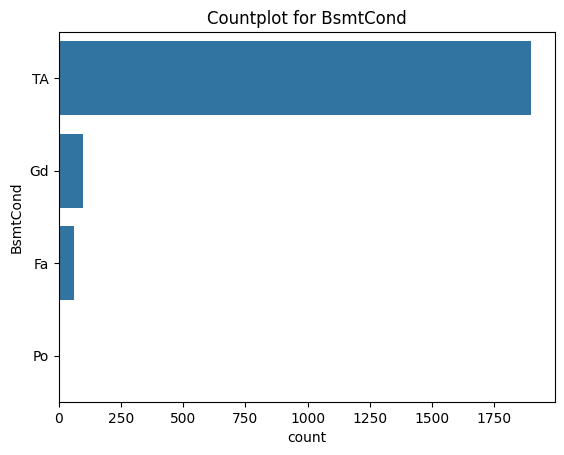

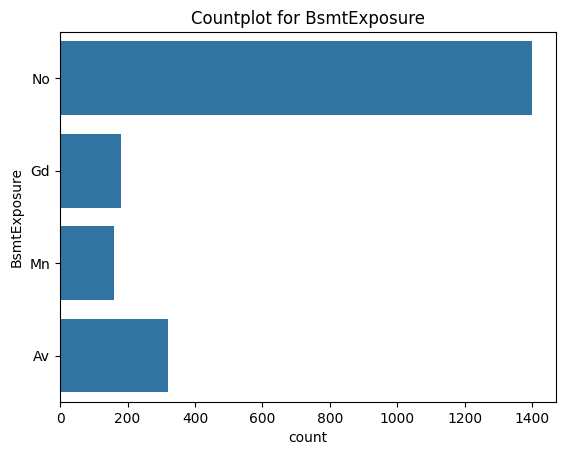

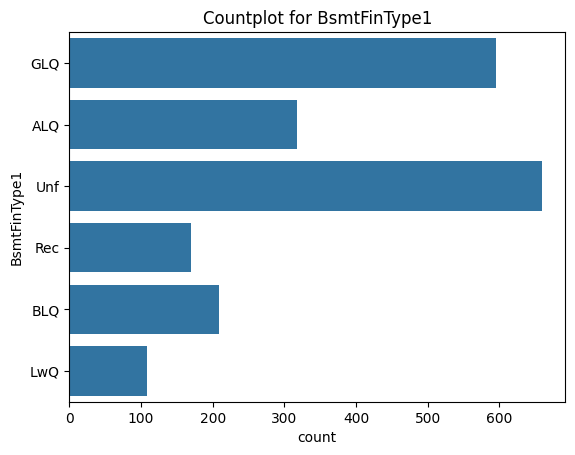

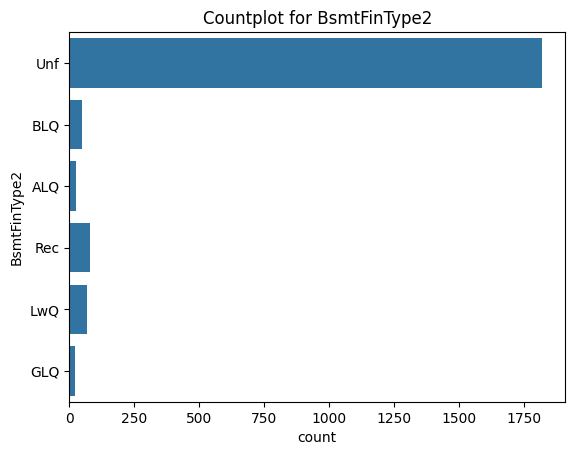

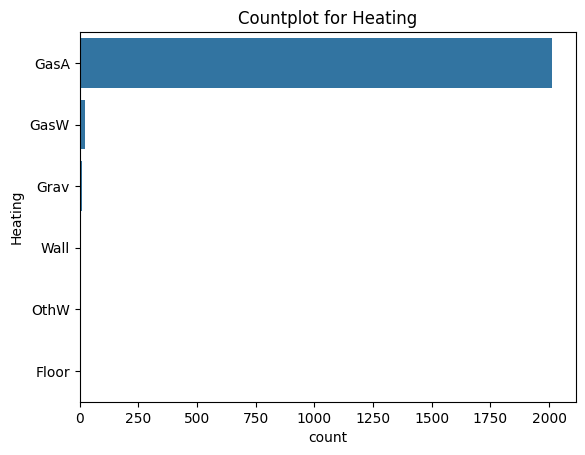

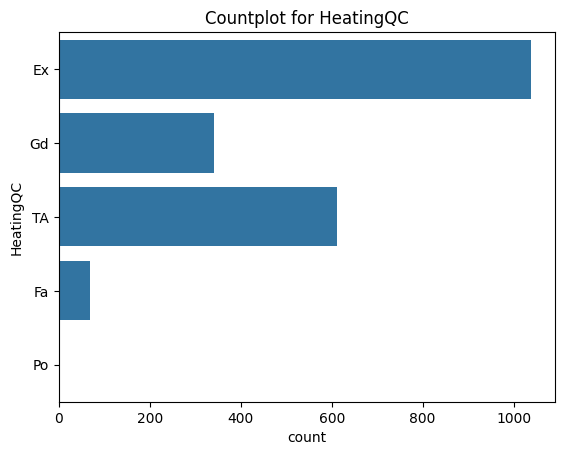

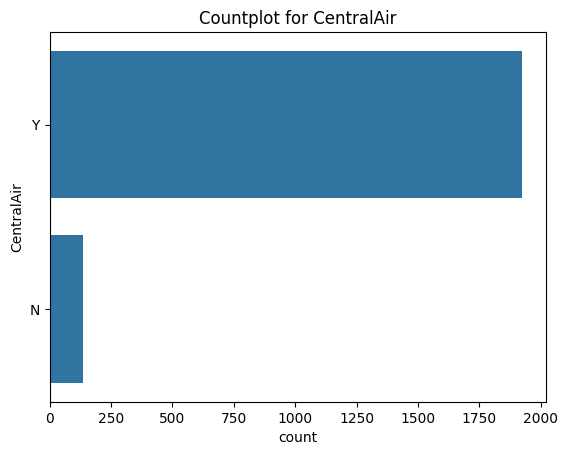

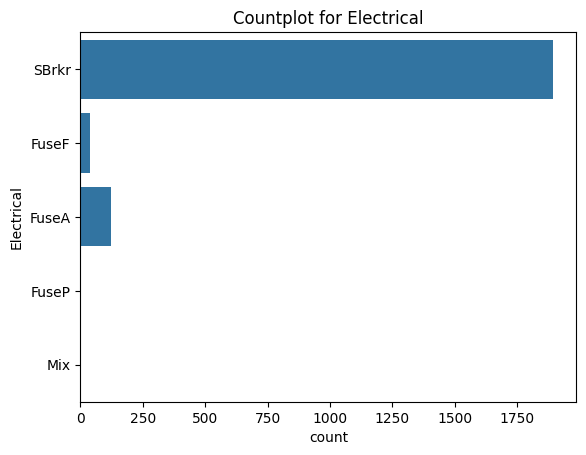

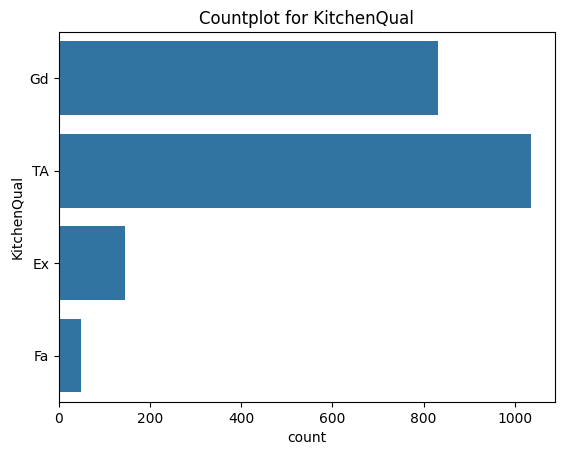

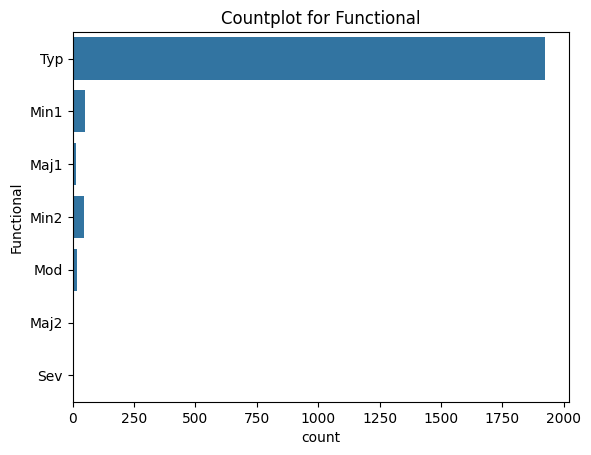

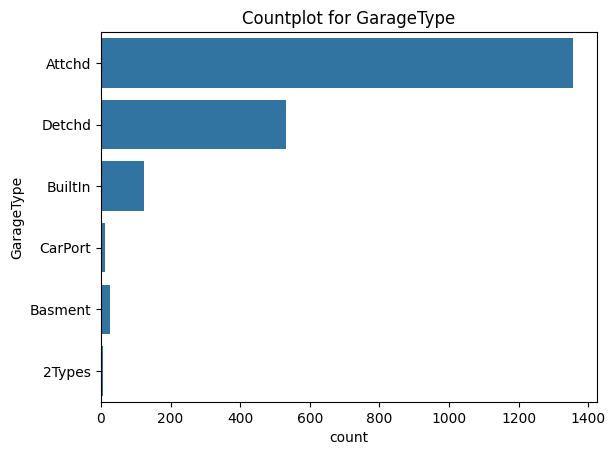

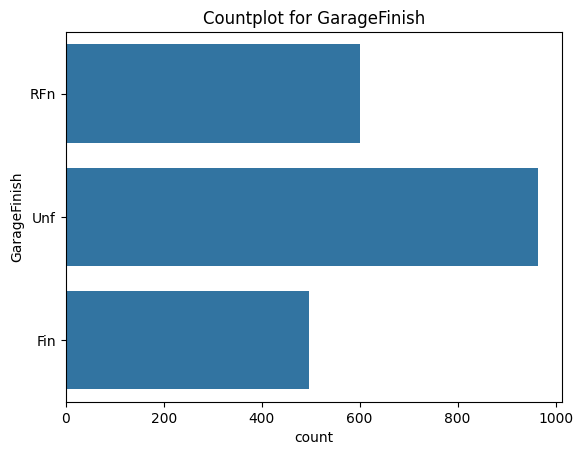

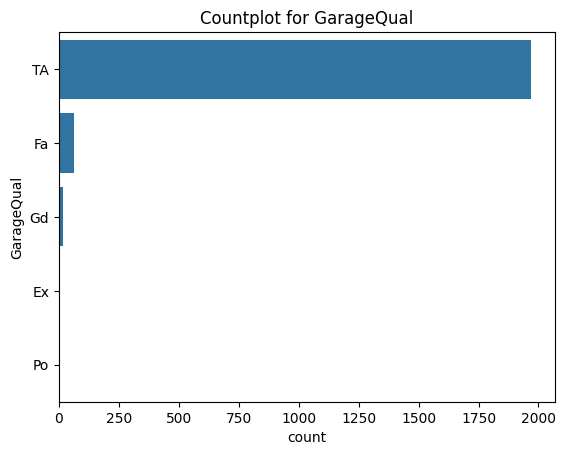

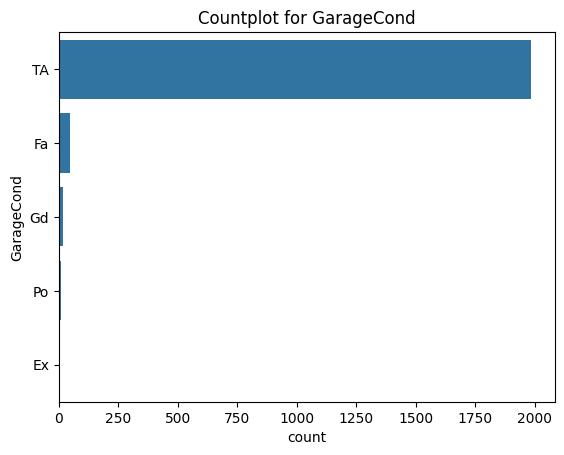

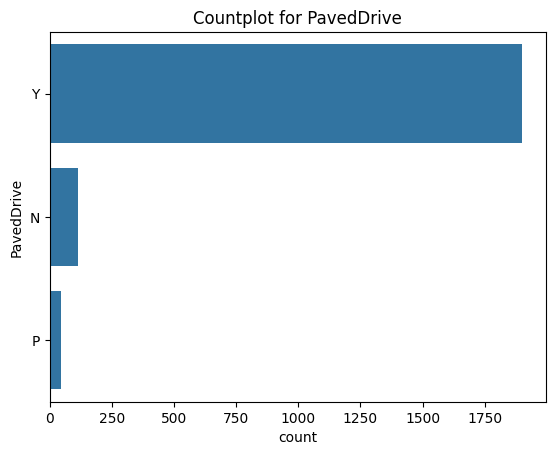

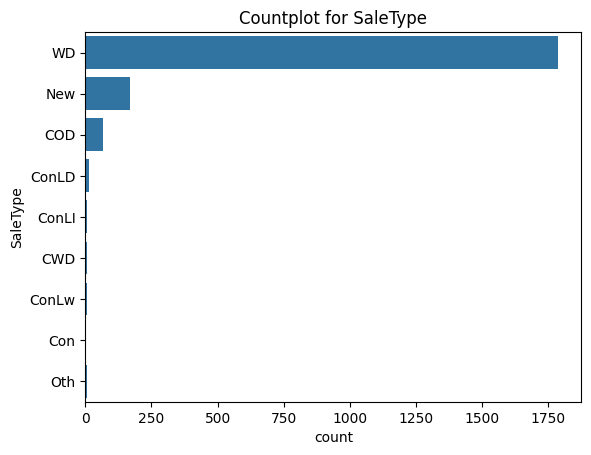

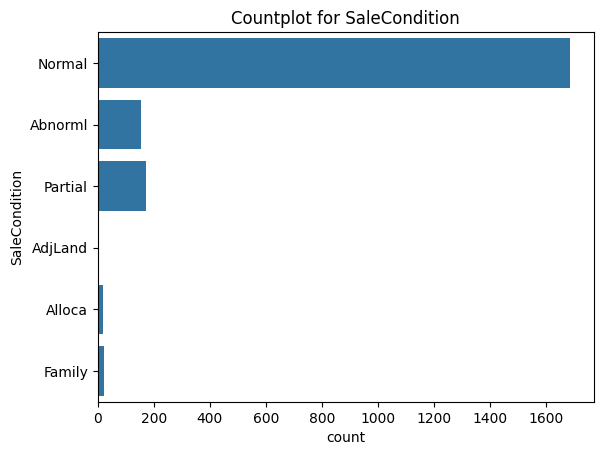

In [26]:
for i in cat_cols:
  sns.countplot(y=df[i])
  plt.title(f'Countplot for {i}')
  plt.show()

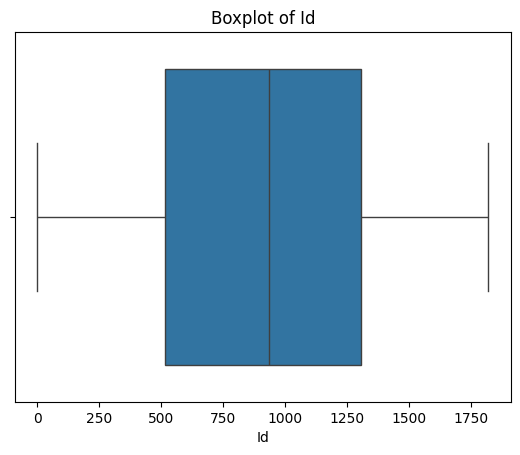

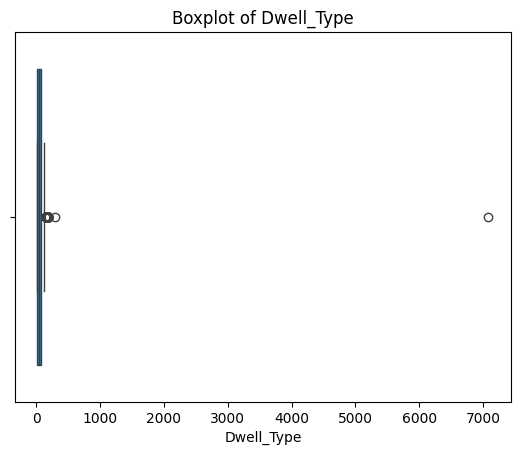

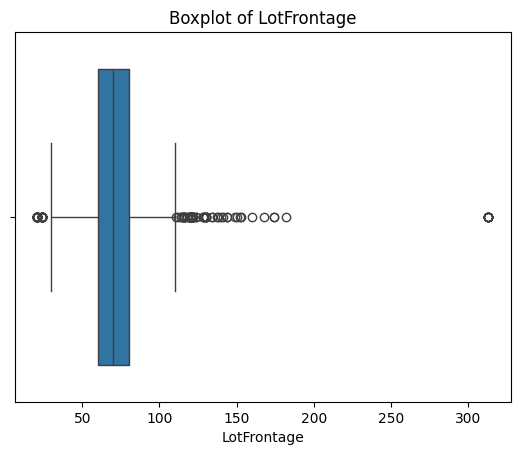

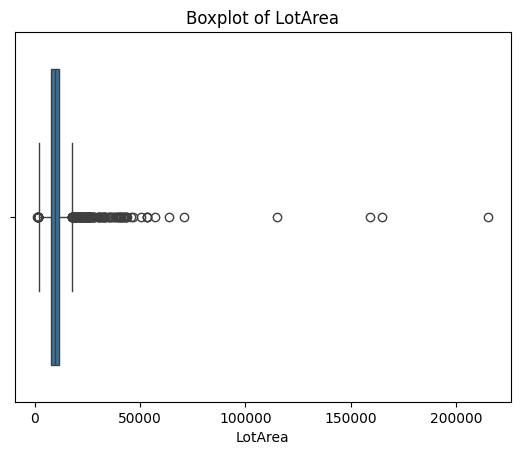

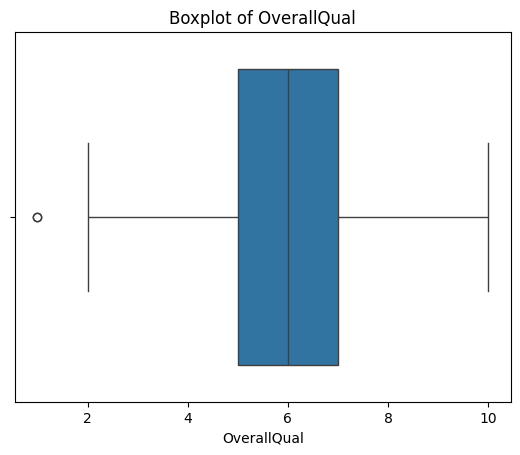

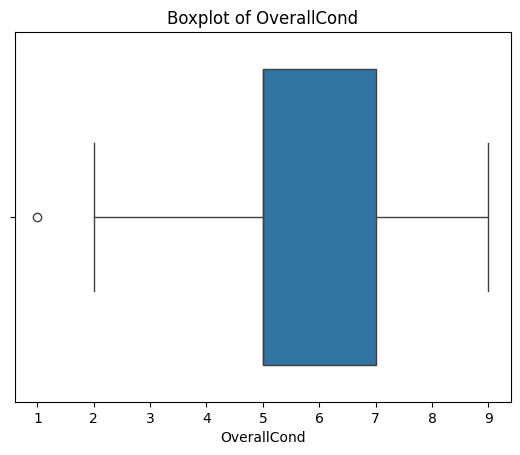

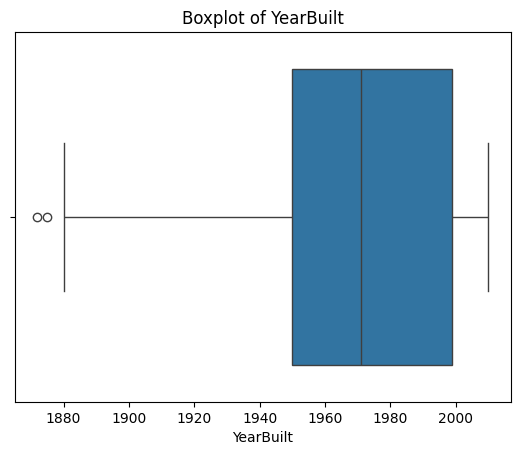

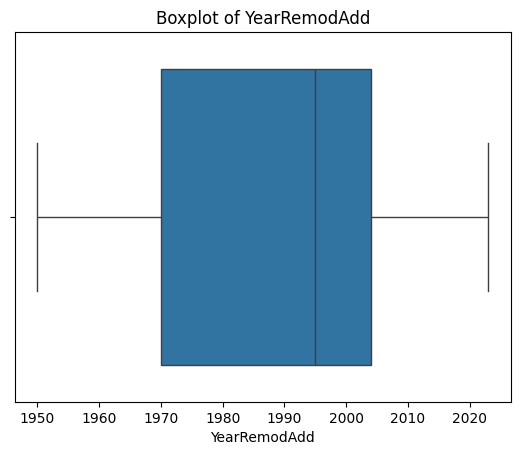

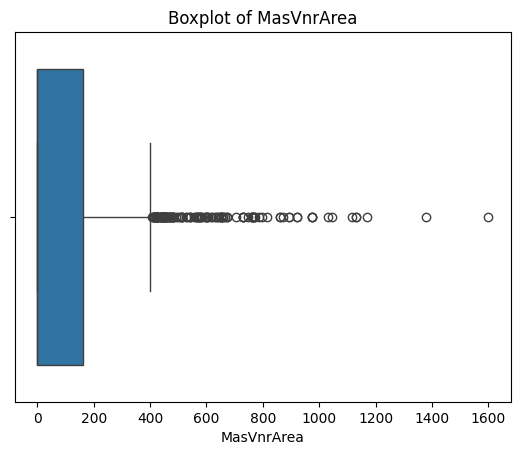

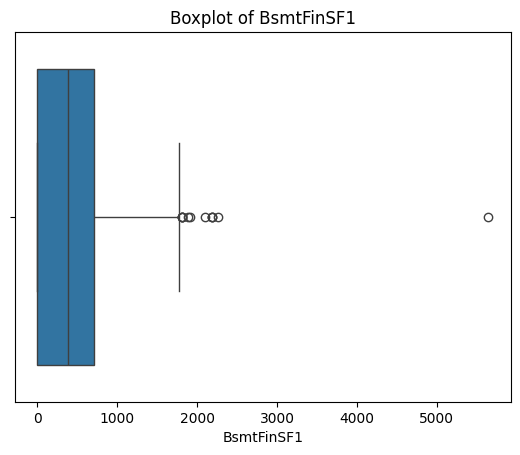

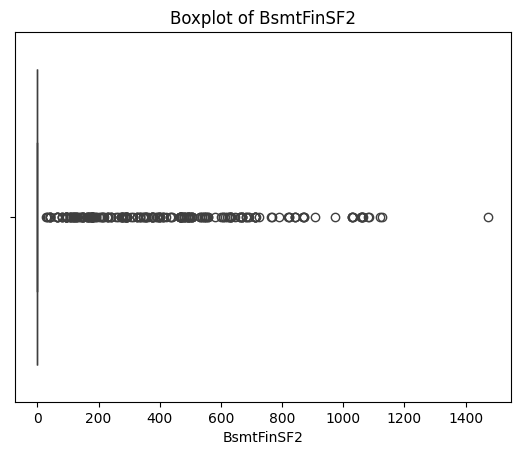

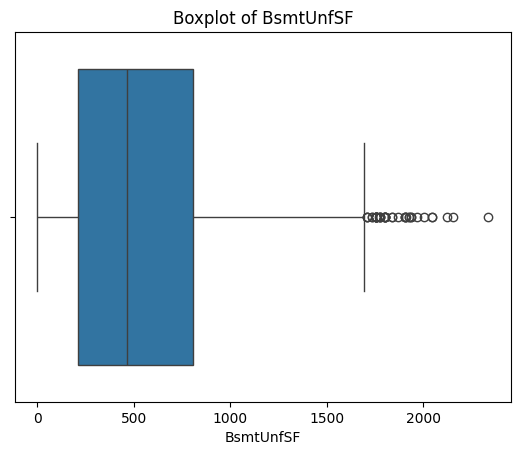

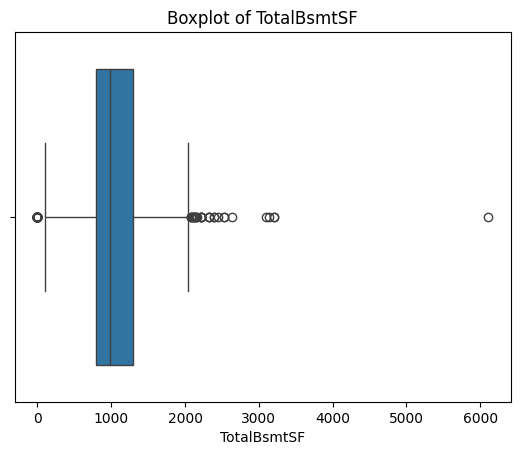

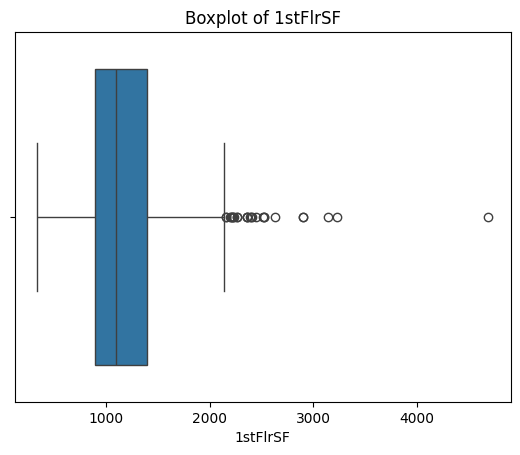

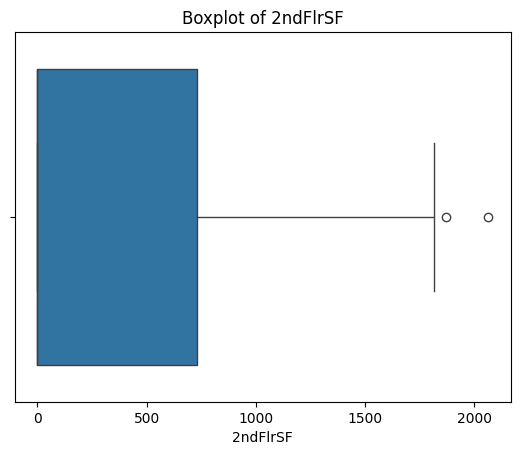

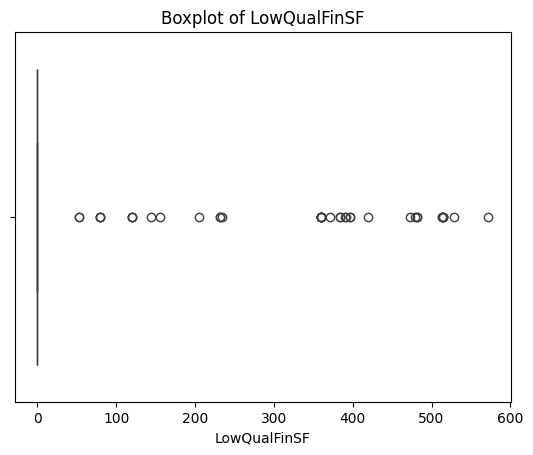

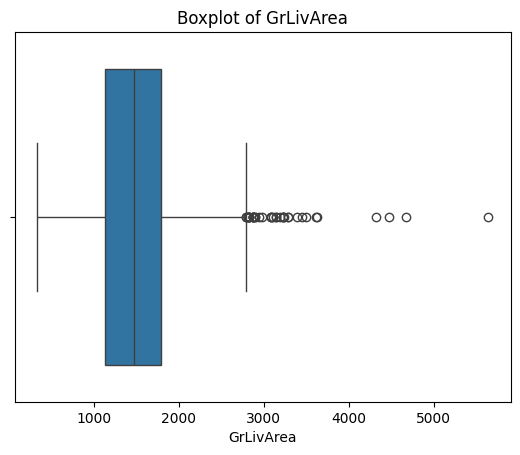

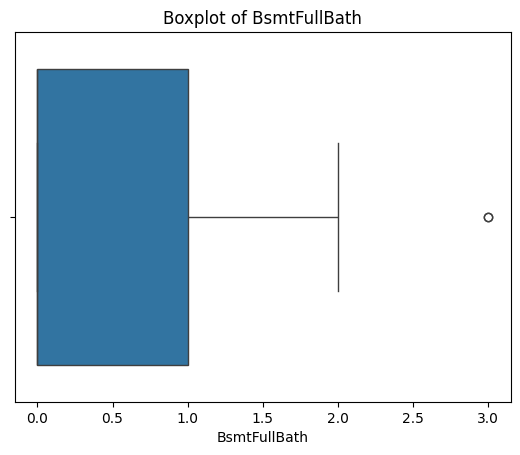

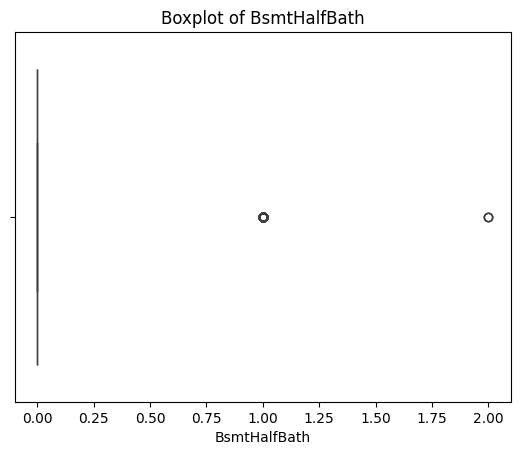

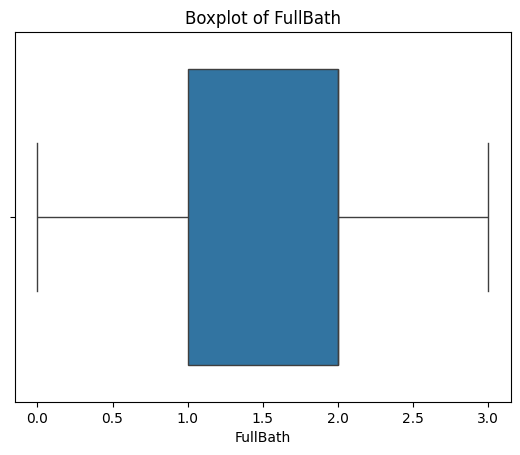

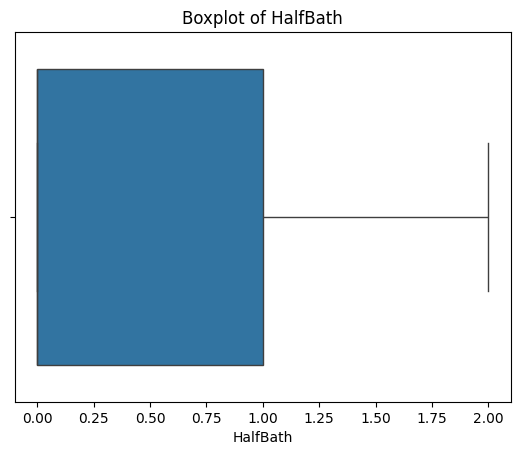

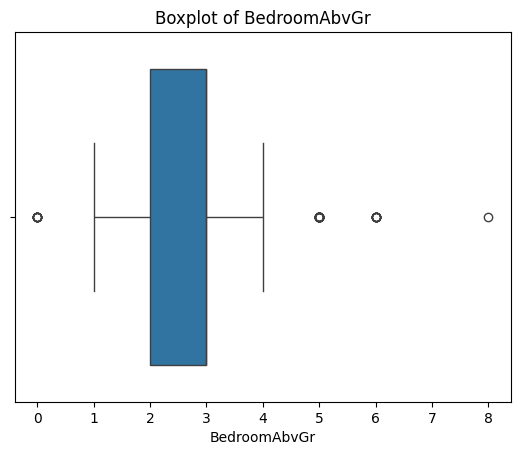

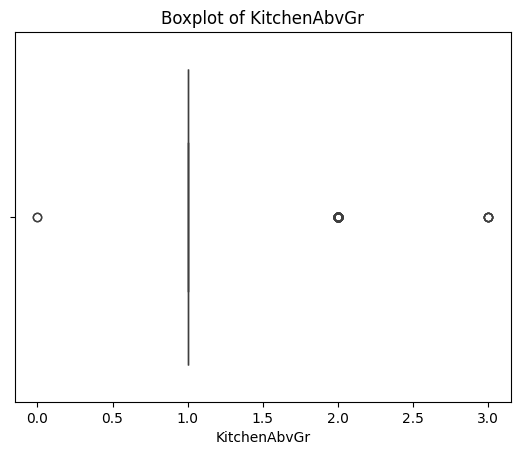

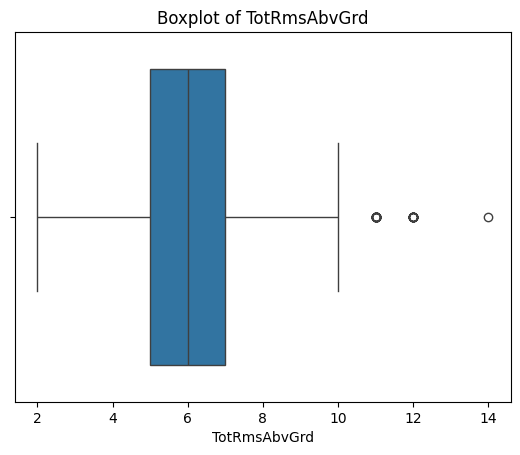

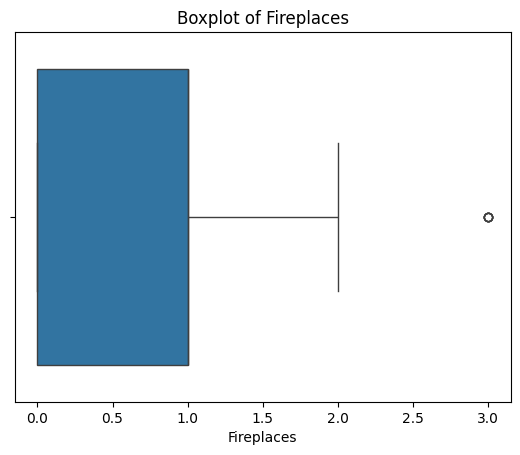

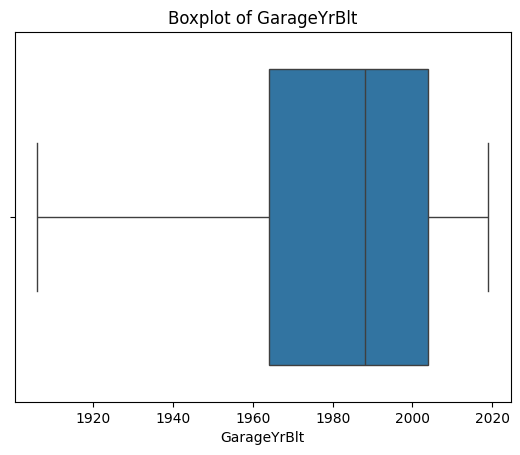

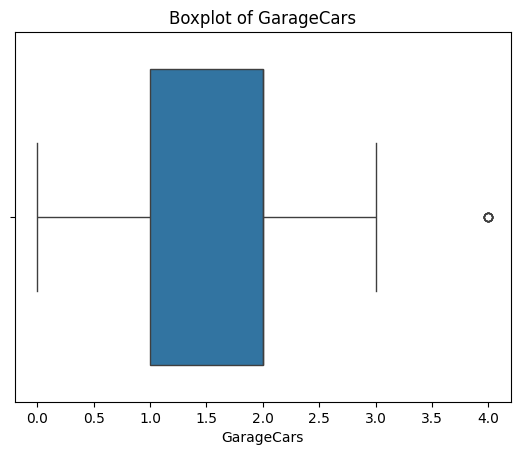

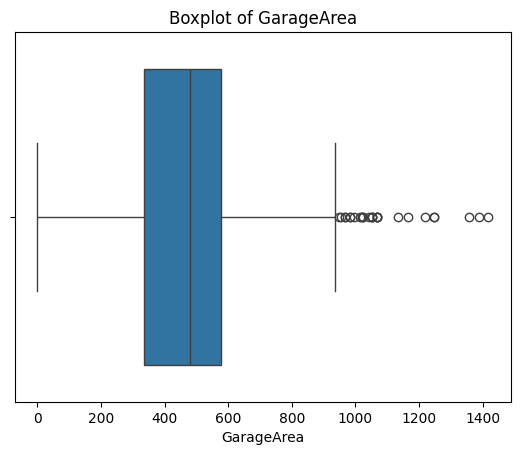

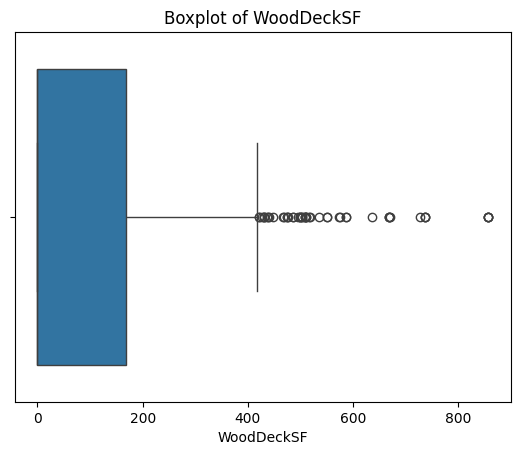

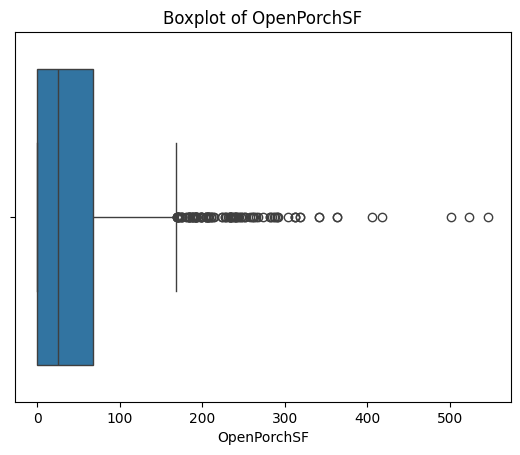

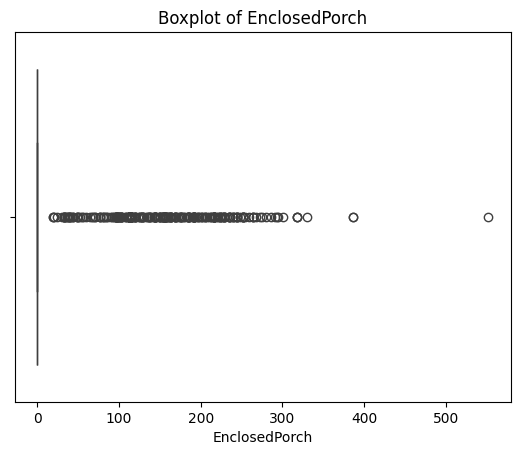

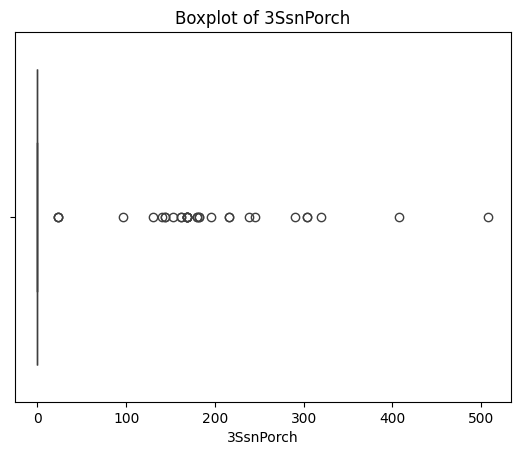

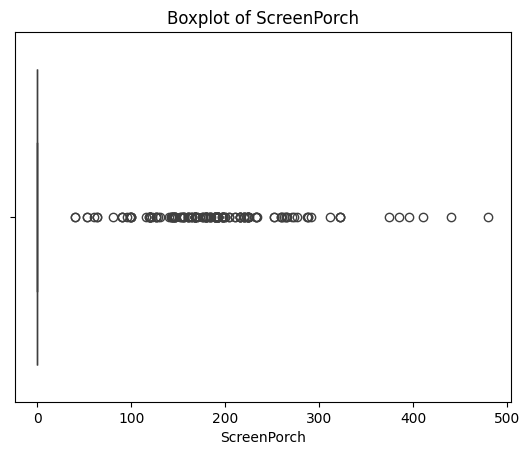

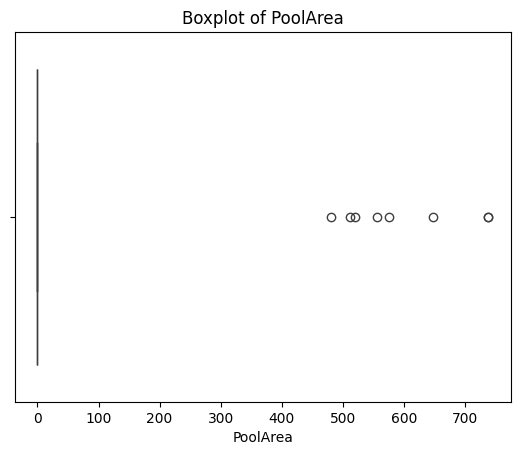

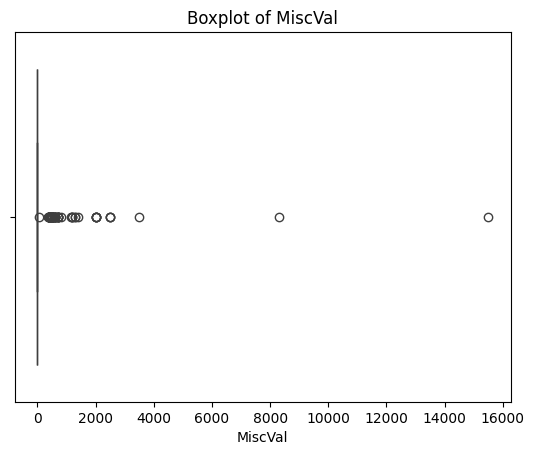

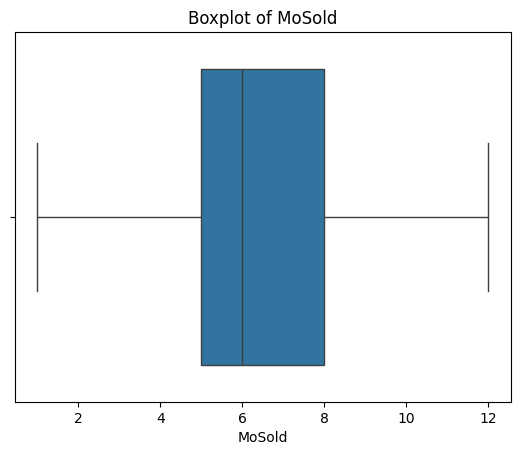

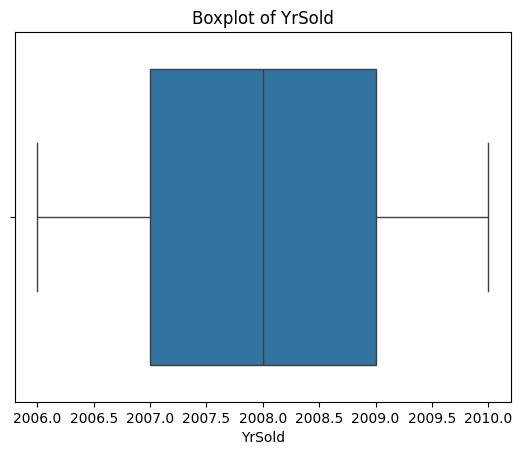

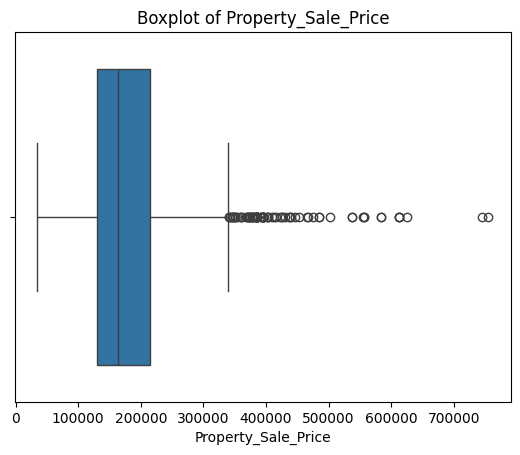

In [27]:
for i in num_cols:
  sns.boxplot(x=df[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

**Handling Outliers**

In [28]:
for i in num_cols:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])

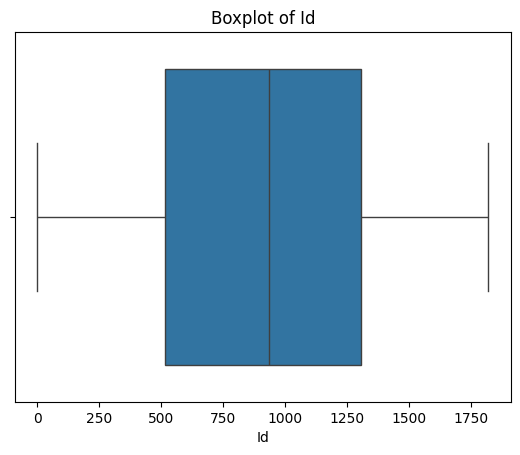

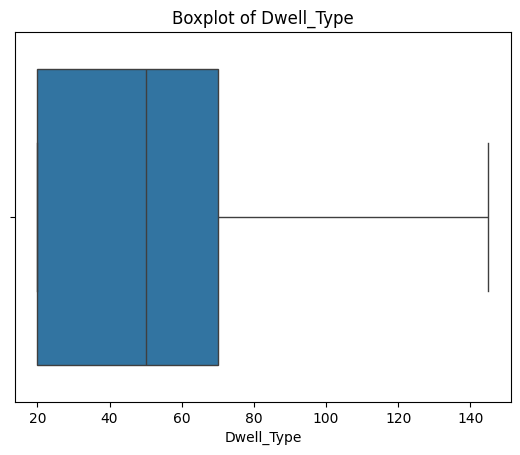

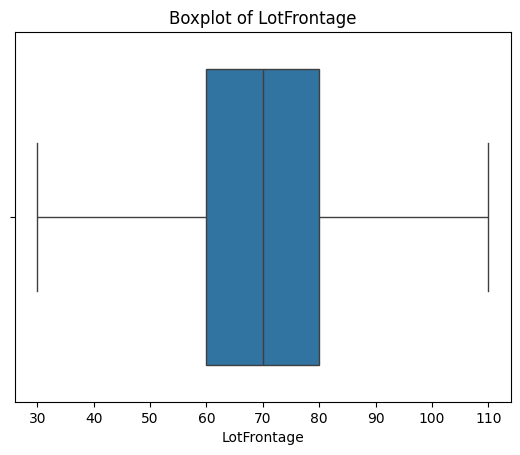

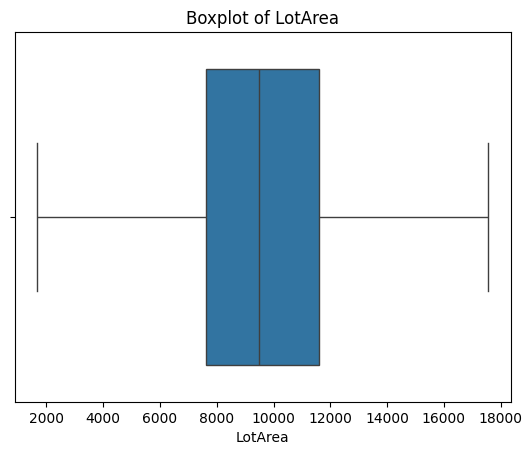

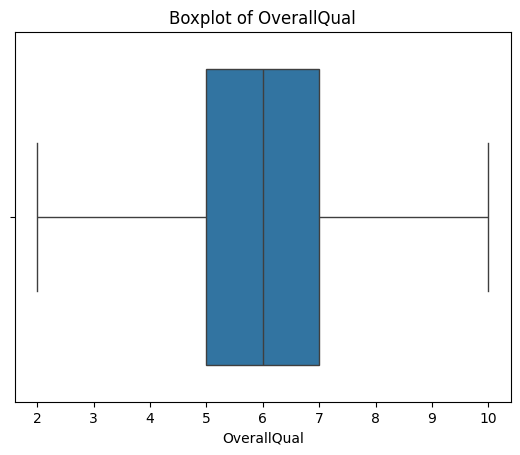

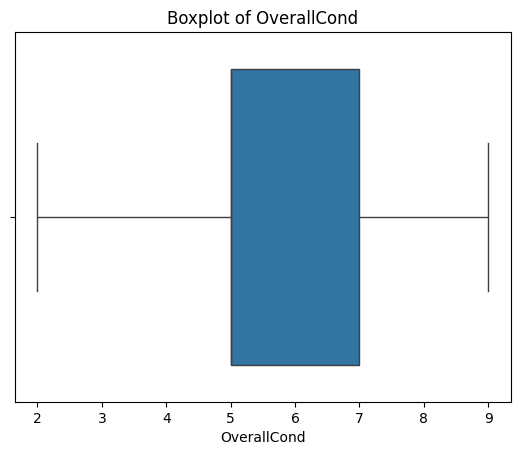

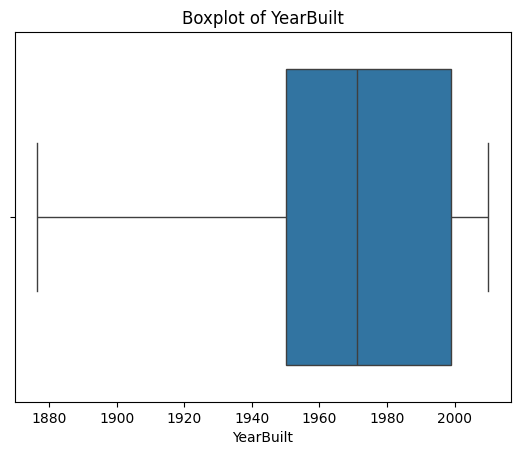

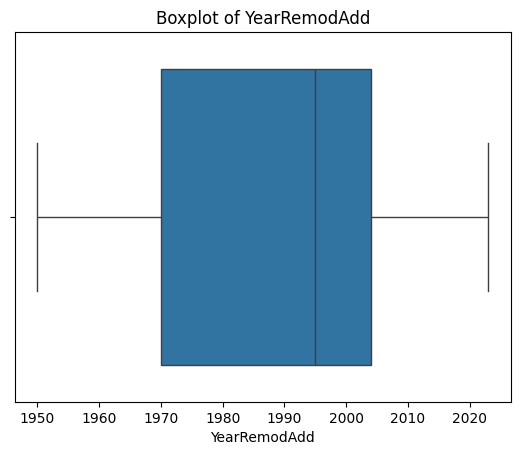

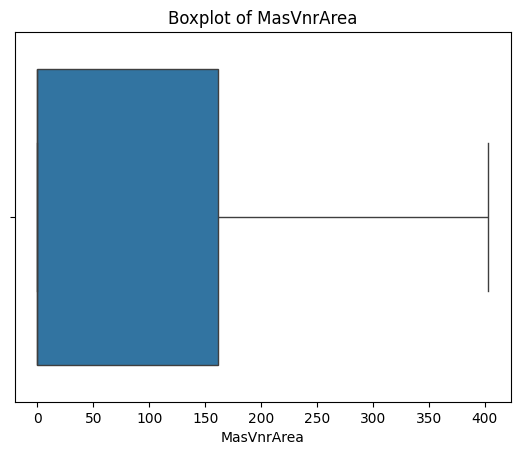

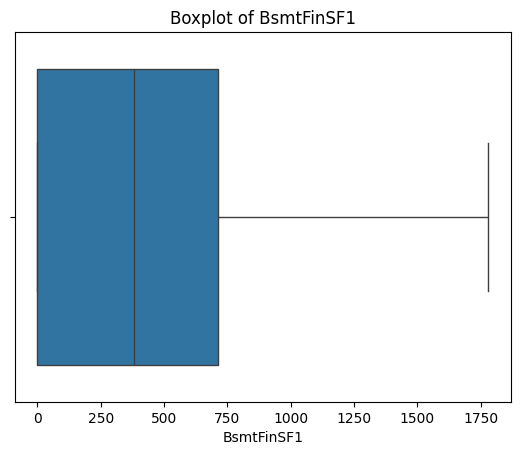

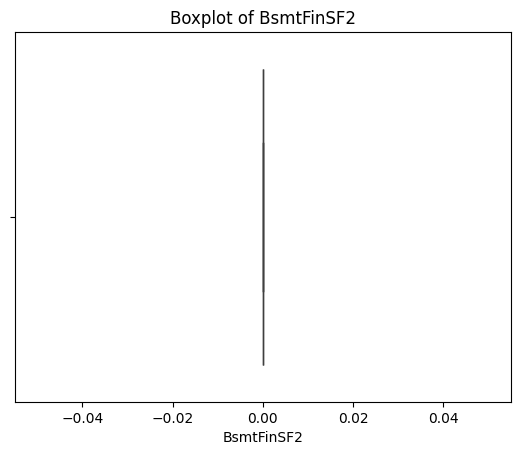

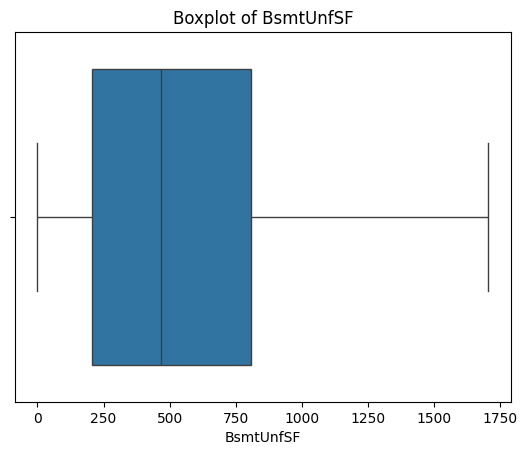

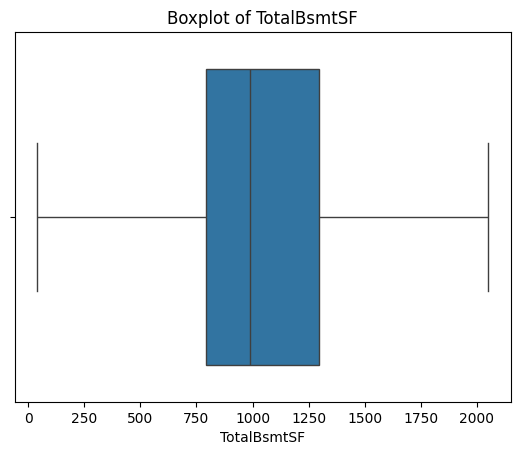

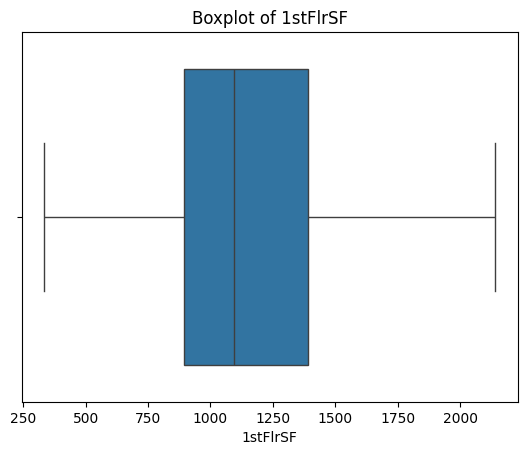

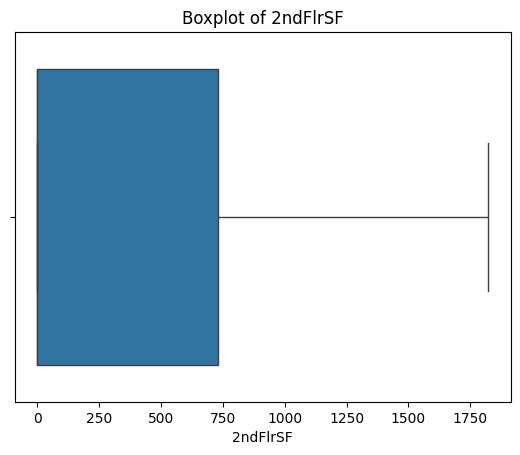

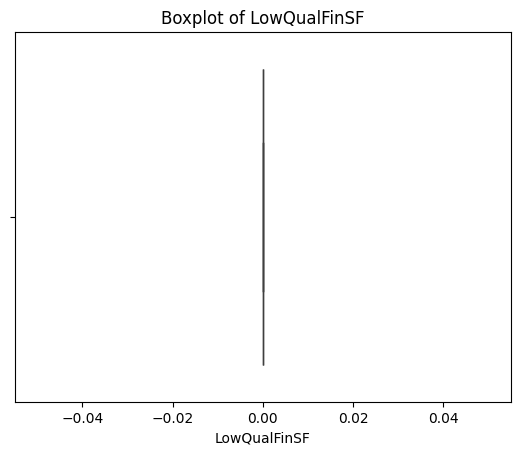

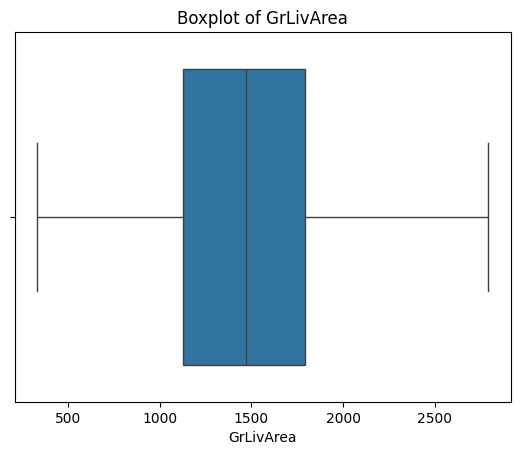

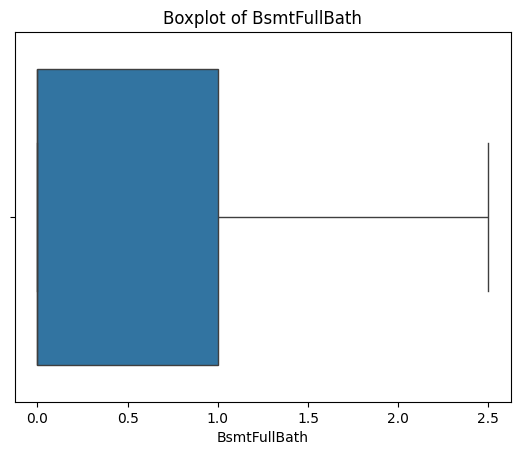

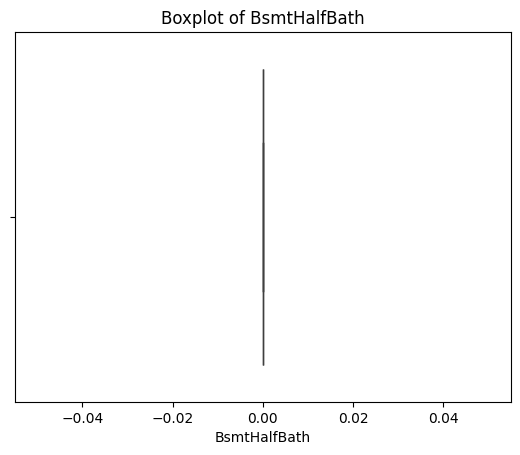

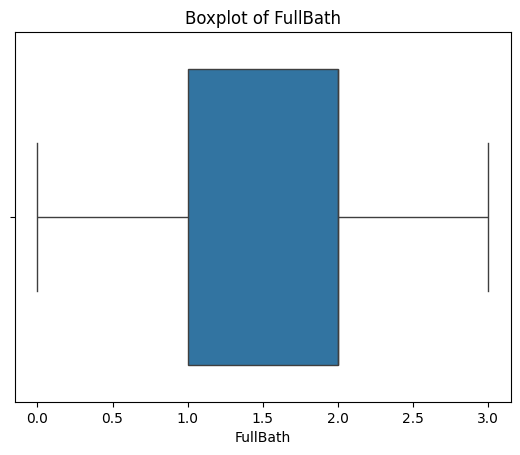

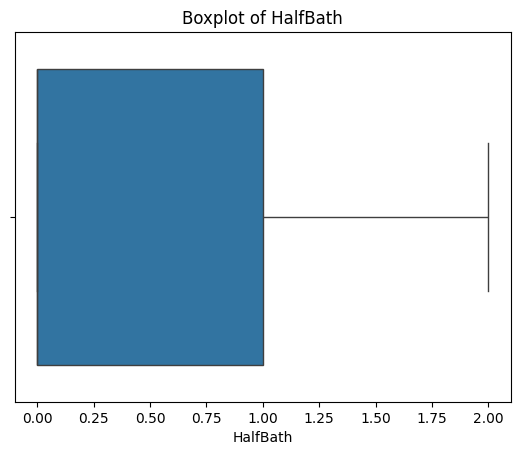

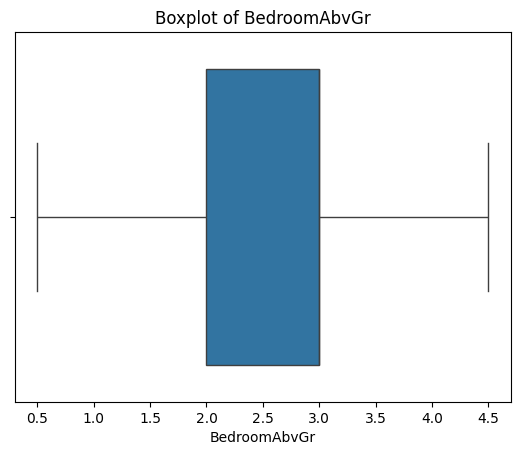

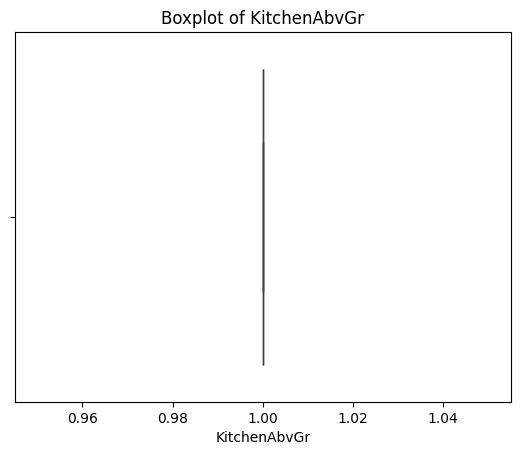

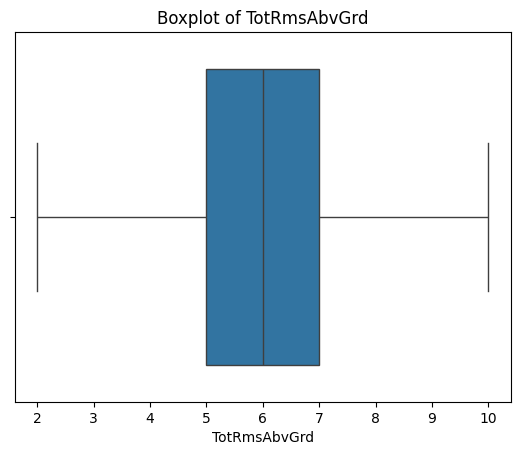

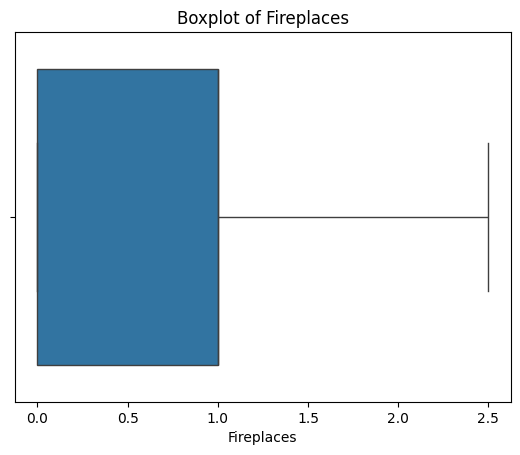

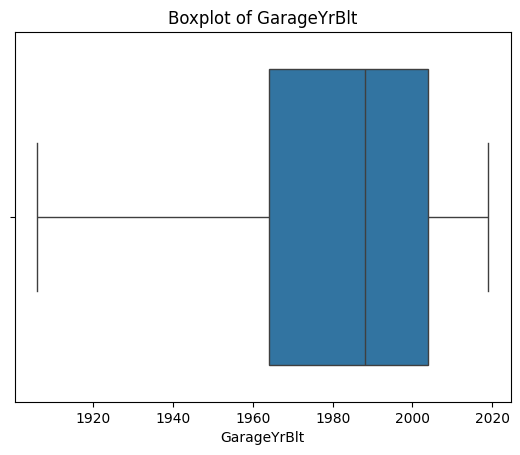

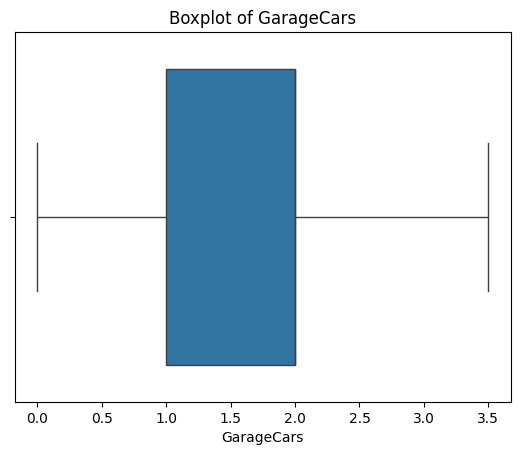

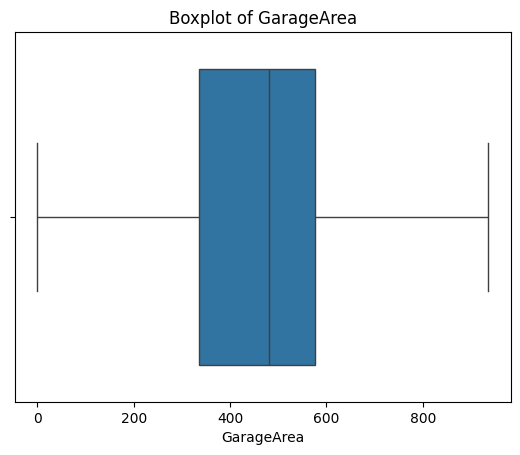

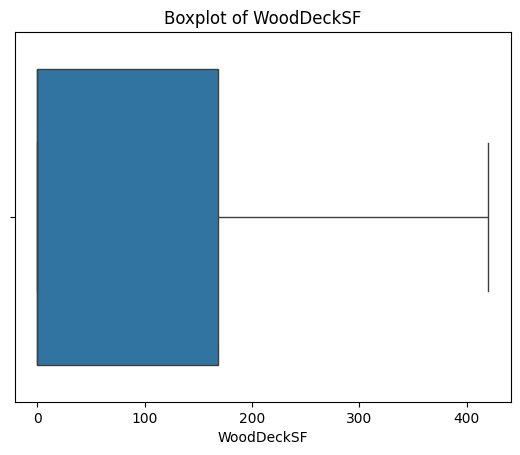

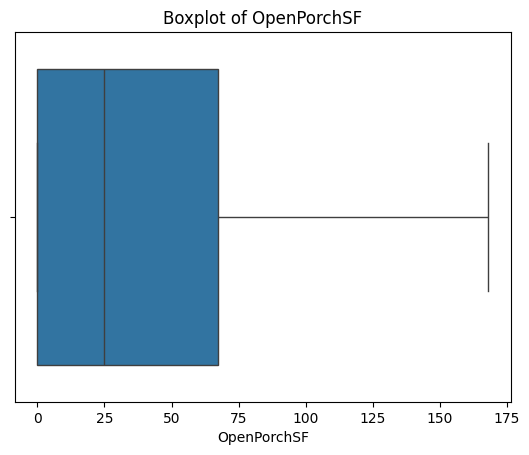

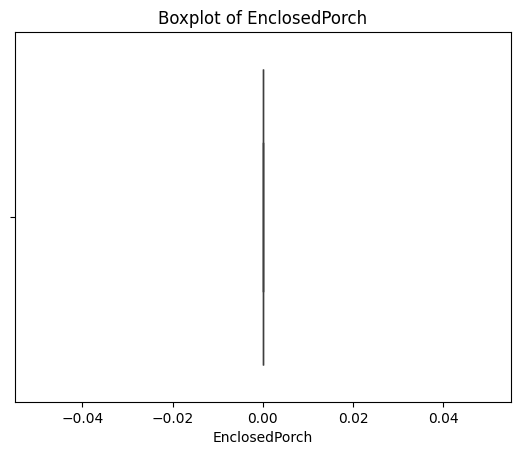

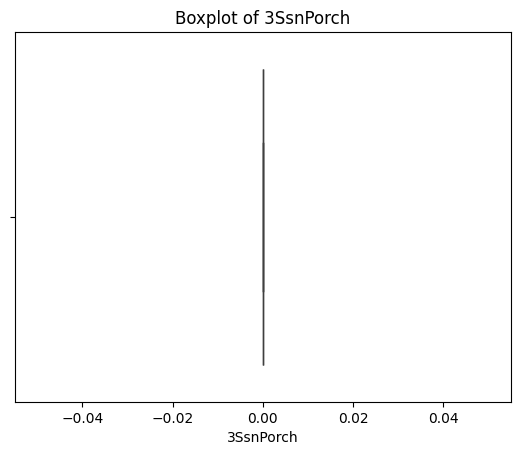

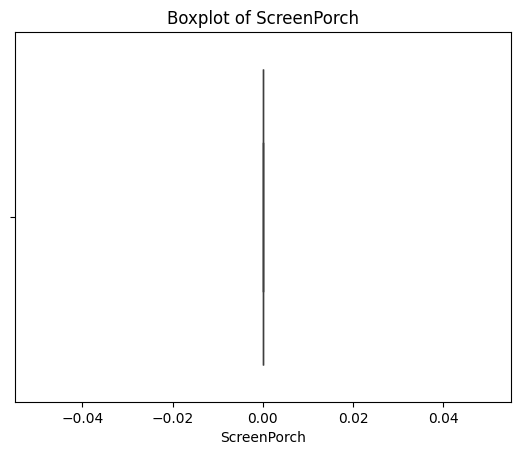

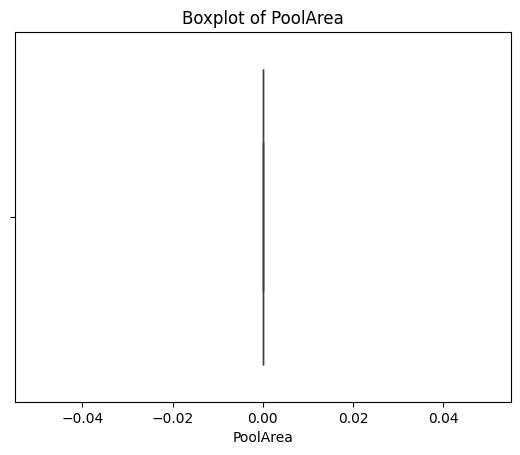

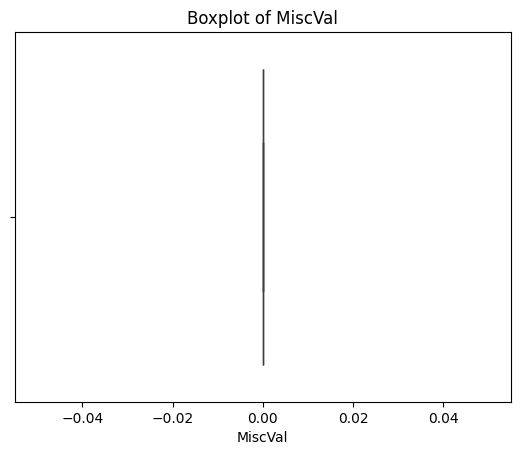

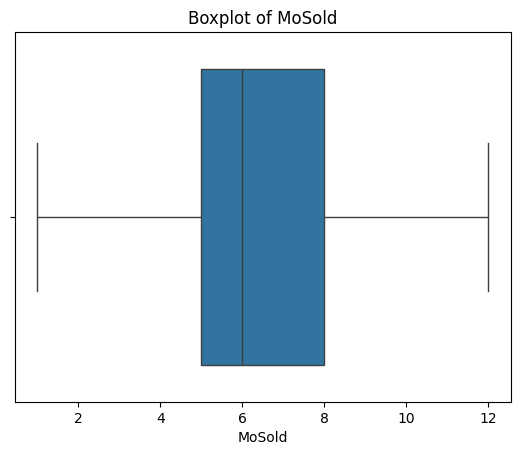

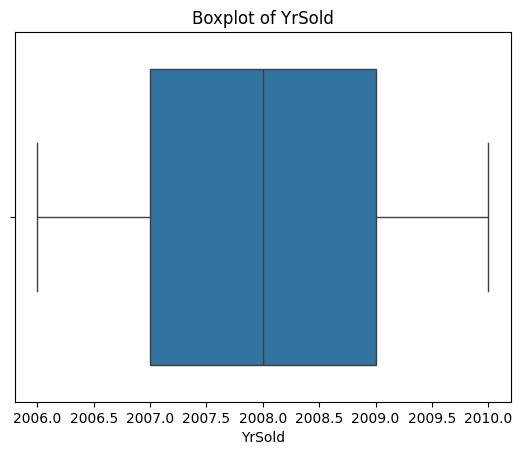

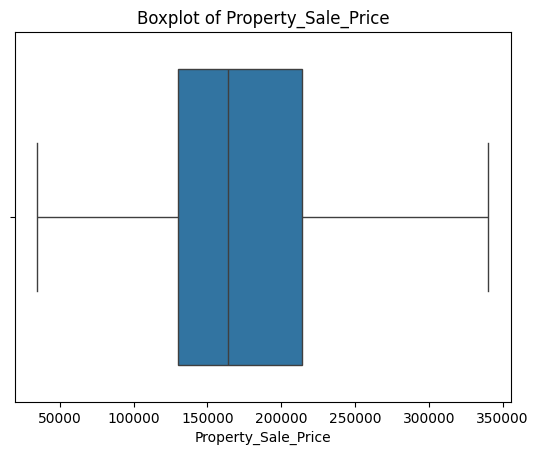

In [29]:
for i in num_cols:
  sns.boxplot(x=df[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

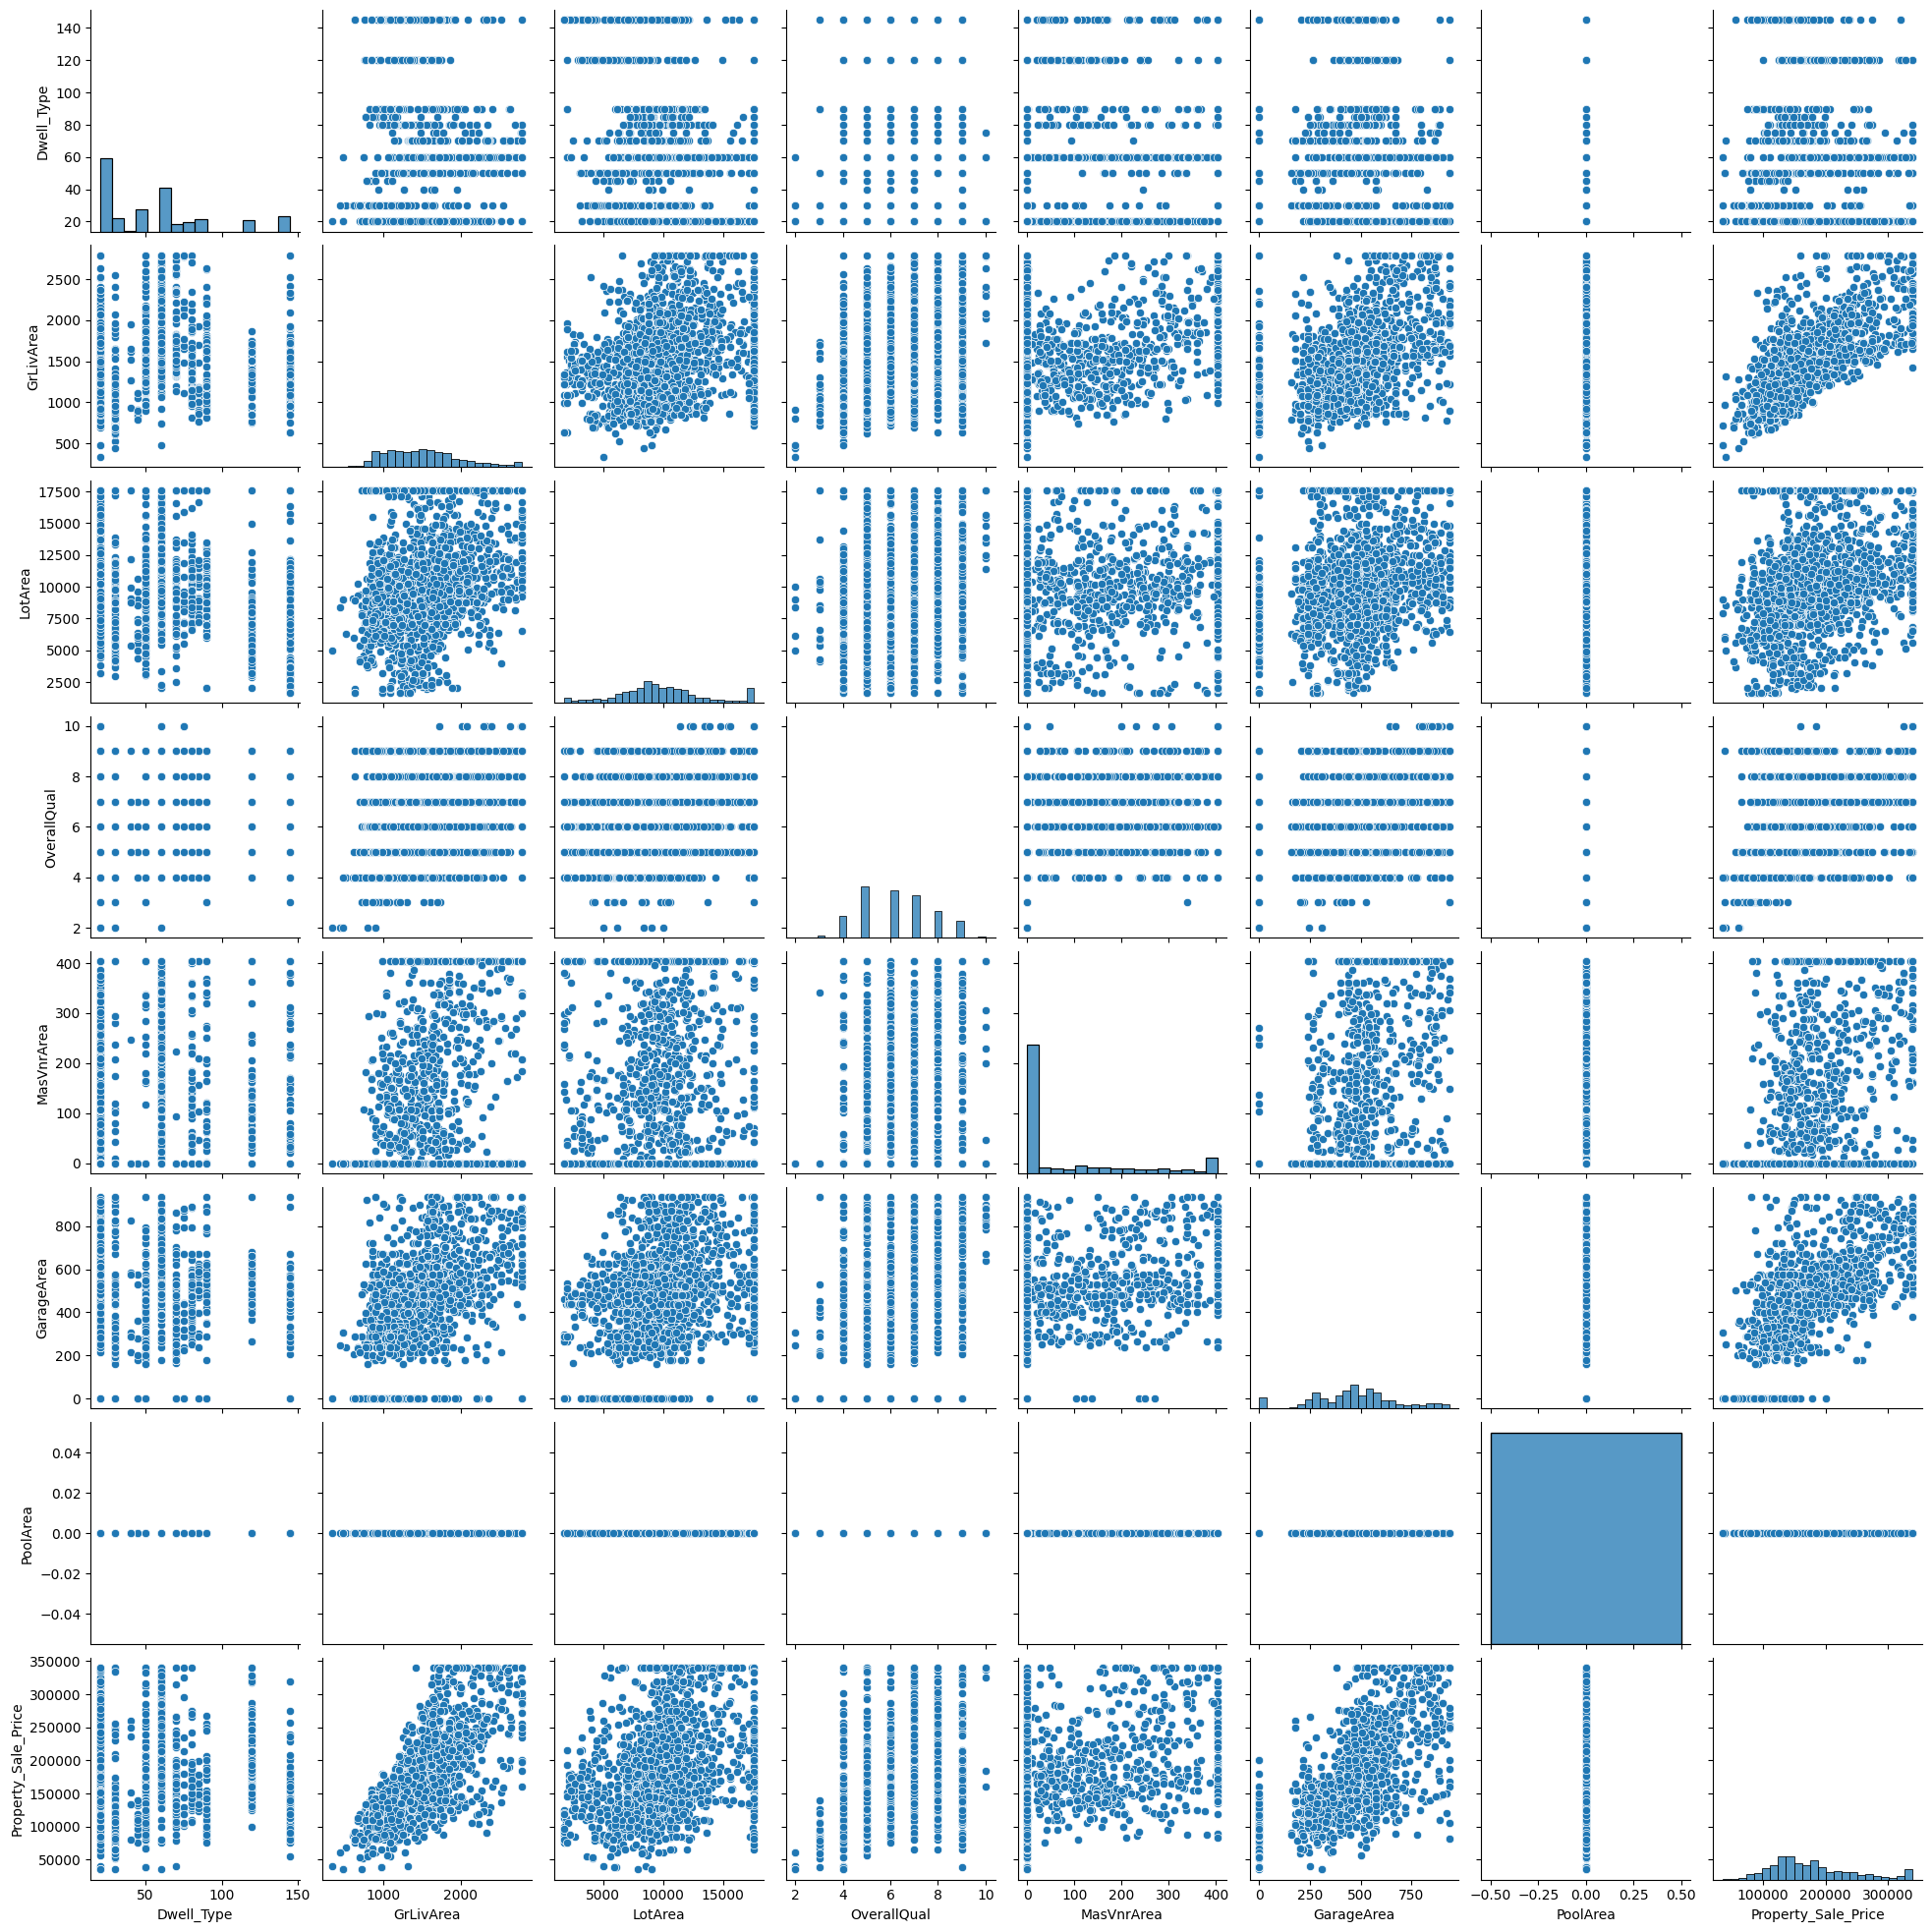

In [30]:
sns.pairplot(df,vars=['Dwell_Type','GrLivArea', 'LotArea', 'OverallQual',
                      'MasVnrArea','GarageArea','PoolArea','Property_Sale_Price'])
plt.show()

**Label Encoding**

In [31]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()

In [32]:
cat_cols=df.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['Zone_Class', 'Road_Type', 'Property_Shape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'Dwelling_Type', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [33]:
df2=df.copy()

In [34]:
for i in cat_cols:
    df[i] = lb.fit_transform(df[i])

In [35]:
df['Zone_Class'].value_counts()

,count
Zone_Class,
3,1602
4,323
1,100
2,21
0,14


In [36]:
df.dtypes.value_counts()

,count
float64,38
int64,37


**Selecting Indepedent and Dependent Variable**

In [37]:
x = df.drop('Property_Sale_Price',axis=1)
y = np.log(df['Property_Sale_Price'])
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(2060, 74)
(2060,)


**Spliting Data into Train and Test**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1442, 74)
(618, 74)
(1442,)
(618,)


In [40]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [41]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)

def mscore(model):
    print('Train Score',model.score(x_train,y_train))  # Train R2 Score
    print('Test Score',model.score(x_test,y_test))     # Test R2 Score

***Model Building***

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)  #

LinearRegression()

In [44]:
mscore(lr1)
# Slightly Overfit

Train Score 0.8763113073278976
Test Score 0.8613959147930078


In [45]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 0.10534205926923652
MSE 0.022284504206479497
RMSE 0.14927995246006578
R2 Score 0.8613959147930078


**OLS**

In [46]:
import statsmodels.api as sm

In [47]:
x1=x.copy()
y1=y.copy()

In [48]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Property_Sale_Price   R-squared:                       0.875
Model:                             OLS   Adj. R-squared:                  0.871
Method:                  Least Squares   F-statistic:                     214.7
Date:                 Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                         06:00:03   Log-Likelihood:                 1210.3
No. Observations:                 2060   AIC:                            -2289.
Df Residuals:                     1994   BIC:                            -1917.
Df Model:                           65                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Id             -1.149e-05   6.47e-06     -1.777      0.076   -2.42e-05    1.19e-06
Dwell_Type         0.0002      0.000      0.972      0.331      -0.000       0.001
Zone_Class        -0.0199      0.005     -3.821      0.000      -0.030      -0.010
LotFrontage    -7.358e-05      0.000     -0.351      0.726      -0.000       0.000
LotArea         3.209e-06   1.11e-06      2.902      0.004    1.04e-06    5.38e-06
Road_Type          0.2168      0.048      4.534      0.000       0.123       0.311
Property_Shape    -0.0083      0.002     -3.465      0.001      -0.013      -0.004
LandContour       -0.0021      0.005     -0.428      0.669      -0.011       0.007
Utilities         -0.0238      0.085     -0.280      0.779      -0.190       0.143
LotConfig         -0.0020      0.002     -1.017      0.309      -0.006       0.002
LandSlope          0.0217      0.013      1.645      0.100      -0.004       0.048
Neighborhood       0.0002      0.001      0.430      0.667      -0.001       0.001
Condition1         0.0100      0.004      2.784      0.005       0.003       0.017
Condition2        -0.0326      0.013     -2.505      0.012      -0.058      -0.007
Dwelling_Type     -0.0111      0.005     -2.096      0.036      -0.022      -0.001
HouseStyle         0.0006      0.002      0.244      0.807      -0.004       0.005
OverallQual        0.0118      0.002      4.780      0.000       0.007       0.017
OverallCond        0.0162      0.003      6.440      0.000       0.011       0.021
YearBuilt          0.0004      0.000      2.130      0.033    2.93e-05       0.001
YearRemodAdd       0.0017      0.000      7.080      0.000       0.001       0.002
RoofStyle         -0.0021      0.004     -0.543      0.587      -0.010       0.006
RoofMatl           0.0122      0.005      2.308      0.021       0.002       0.022
Exterior1st       -0.0053      0.002     -2.863      0.004      -0.009      -0.002
Exterior2nd        0.0053      0.002      3.204      0.001       0.002       0.009
MasVnrArea       2.62e-05   2.77e-05      0.947      0.344   -2.81e-05    8.05e-05
ExterQual         -0.0153      0.007     -2.213      0.027      -0.029      -0.002
ExterCond          0.0073      0.005      1.625      0.104      -0.002       0.016
Foundation         0.0237      0.006      4.094      0.000       0.012       0.035
BsmtQual          -0.0170      0.005     -3.319      0.001      -0.027      -0.007
BsmtCond           0.0038      0.005      0.760      0.447      -0.006       0.013
BsmtExposure      -0.0067      0.003     -2.121      0.034      -0.013      -0.001
BsmtFinType1      -0.0033      0.002     -1.431      0.153      -0.008       0.001
BsmtFinSF1     -4.956e-05   2.57e-05     -1.927      0.054     -0.0001     8.7e-07
BsmtFinType2       0.0115      0.005      2.475      0.013       0.002       0.021
B

In [49]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

0.8749626192551309
0.8708866765528156
